In [1]:
import os, glob, pickle
import sys
import numpy as np
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
%matplotlib inline

In [2]:
path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(path) 
from utils.training import train_cplmixVAE
from utils.eval_models import eval_mixmodel
from utils.cluster_analysis import K_selection

In [3]:
n_run = 2
n_donor = 5
n_categories = 10
state_dim = 10
n_arm = 2
tau = .1
fc_dim = 100
latent_dim = 30
lr = 0.001
p_drop = .2
batch_size = 1000
n_epoch = 1000
n_epoch_p = 1000
n_gene = 7787 #4130
subclass = 'L4-IT'
device = None
exclude_donors = ['UWA 7027', 'UWA 7227', 'UWA 7043', 'UWA 7157', 'UWA 6965'] #'UWA 7027', 'UWA 7227', 

In [4]:
data_path = path + '/data/AD_MTG_L4-IT_nGene_' + str(n_gene) + '_nDonor_84.p'
folder_name = f'{subclass}_exc{n_donor}Don_run_{n_run}_K_{n_categories}_Sdim_{state_dim}_ngene_{n_gene}_fcDim_{fc_dim}_latDim_{latent_dim}_lr_{lr}_pDrop_{p_drop}_n_arm_{n_arm}_tau_{tau}_bsize_{batch_size}_nepoch_{n_epoch}_nepochP_{n_epoch_p}'
saving_folder = path + "/results/cpl_mixVAE/"
saving_folder = saving_folder + str(folder_name)
saving_folder

'/Users/yeganeh.marghi/github/cplmix_AD/results/cpl_mixVAE/L4-IT_exc5Don_run_2_K_10_Sdim_10_ngene_7787_fcDim_100_latDim_30_lr_0.001_pDrop_0.2_n_arm_2_tau_0.1_bsize_1000_nepoch_1000_nepochP_1000'

In [41]:
models = glob.glob(saving_folder + '/model/cpl_mixVAE_model_*')
cpl_mixVAE, data, sum_dict = eval_mixmodel(n_categories=n_categories, 
                                       state_dim=state_dim, 
                                       n_arm=n_arm,
                                       latent_dim=latent_dim,
                                       fc_dim=fc_dim,
                                       tau=tau,
                                       subclass=subclass,
                                       saving_folder=saving_folder, 
                                       data_path=data_path,
                                       exclude_donors=exclude_donors,
                                       device=device,
                                       models=models)

n_pruning = len(sum_dict['cT_vs_cT'])
with open(saving_folder + f'/sum_dict_{n_pruning}.npy', 'wb') as f:
    np.save(f, sum_dict)
    
f.close()  

loading AD L4-IT data ... 
Data is loaded
['L4 IT_1' 'L4 IT_2' 'L4 IT_3' 'L4 IT_4']
['UWA 6948' 'UWA 6962' 'UWA 6966' 'UWA 6967' 'UWA 6983' 'UWA 6989'
 'UWA 6991' 'UWA 6992' 'UWA 6993' 'UWA 6997' 'UWA 6999' 'UWA 7000'
 'UWA 7017' 'UWA 7027' 'UWA 7028' 'UWA 7038' 'UWA 7041' 'UWA 7045'
 'UWA 7048' 'UWA 7049' 'UWA 7051' 'UWA 7055' 'UWA 7056' 'UWA 7058'
 'UWA 7063' 'UWA 7064' 'UWA 7065' 'UWA 7067' 'UWA 7100' 'UWA 7101'
 'UWA 7113' 'UWA 7117' 'UWA 7119' 'UWA 7120' 'UWA 7124' 'UWA 7128'
 'UWA 7129' 'UWA 7136' 'UWA 7138' 'UWA 7144' 'UWA 7146' 'UWA 7150'
 'UWA 7152' 'UWA 7153' 'UWA 7159' 'UWA 7161' 'UWA 7163' 'UWA 7170'
 'UWA 7175' 'UWA 7179' 'UWA 7181' 'UWA 7182' 'UWA 7183' 'UWA 7184'
 'UWA 7186' 'UWA 7188' 'UWA 7197' 'UWA 7227' 'UWA 7237' 'UWA 7239'
 'UWA 7240' 'UWA 7244' 'UWA 7245' 'UWA 7251' 'UWA 7264' 'UWA 7267'
 'UWA 7268' 'UWA 7285' 'UWA 7288' 'UWA 7290' 'UWA 7291' 'UWA 7297'
 'UWA 7303' 'UWA 7317' 'UWA 7322' 'UWA 7323' 'UWA 7370' 'UWA 7374'
 'UWA 7377' 'UWA 7378' 'UWA 7382']
['L4 IT_1'

In [11]:
with open(saving_folder + '/sum_dict_8.npy', 'rb') as f:
    tmp = np.load(f, allow_pickle=True)
    
f.close()
tmp = dict(enumerate(tmp.flatten(), 1))
sum_dict = tmp[1]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/yeganeh.marghi/github/cplmix_AD/results/cpl_mixVAE/L4-IT_exc5Don_run_1_K_10_Sdim_10_ngene_7787_fcDim_100_latDim_30_lr_0.001_pDrop_0.2_n_arm_2_tau_0.1_bsize_1000_nepoch_1000_nepochP_1000/sum_dict_8.npy'

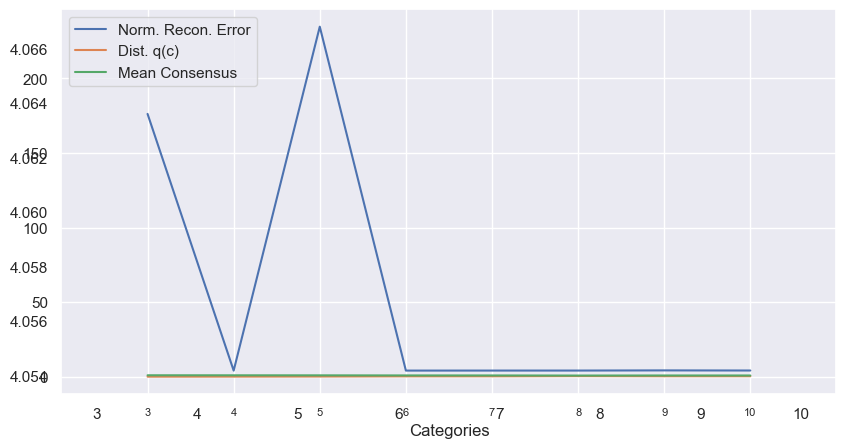

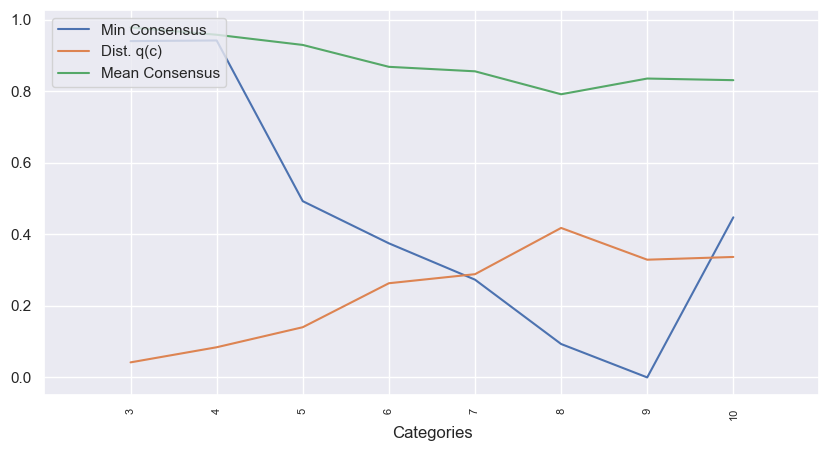

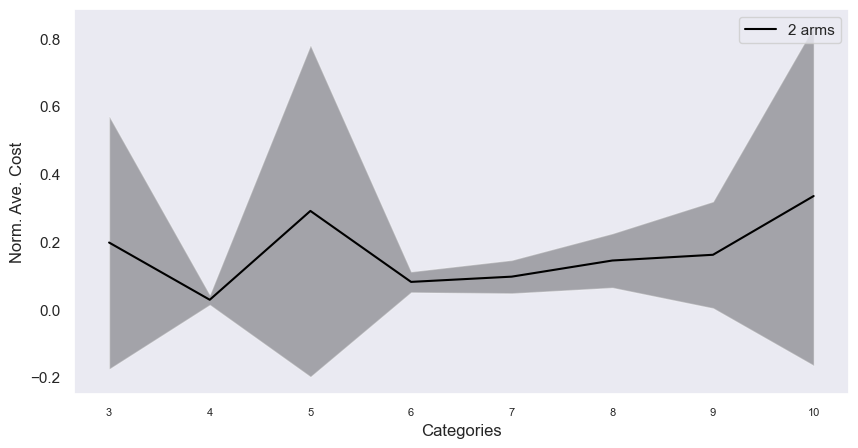

In [42]:
x, y, z = K_selection(sum_dict, n_categories, n_arm, n_gene)

In [5]:
model_order = 4
selected_model = glob.glob(saving_folder + '/model/cpl_mixVAE_model_after_pruning_' + str(n_categories - model_order) + '*')[0]
cpl_mixVAE, data, outcome = eval_mixmodel(n_categories=n_categories, 
                           state_dim=state_dim, 
                           n_arm=n_arm,
                           latent_dim=latent_dim,
                           fc_dim=fc_dim,
                           tau=tau,
                           subclass=subclass,
                           saving_folder=saving_folder, 
                           data_path=data_path,
                           exclude_donors=exclude_donors,
                           device=device,
                           all_data=True,
                           models=[selected_model])

loading AD L4-IT data ... 
Data is loaded
['L4 IT_1' 'L4 IT_2' 'L4 IT_3' 'L4 IT_4']
['UWA 6948' 'UWA 6962' 'UWA 6966' 'UWA 6967' 'UWA 6983' 'UWA 6989'
 'UWA 6991' 'UWA 6992' 'UWA 6993' 'UWA 6997' 'UWA 6999' 'UWA 7000'
 'UWA 7017' 'UWA 7028' 'UWA 7038' 'UWA 7041' 'UWA 7045' 'UWA 7048'
 'UWA 7049' 'UWA 7051' 'UWA 7055' 'UWA 7056' 'UWA 7058' 'UWA 7063'
 'UWA 7064' 'UWA 7065' 'UWA 7067' 'UWA 7100' 'UWA 7101' 'UWA 7113'
 'UWA 7117' 'UWA 7119' 'UWA 7120' 'UWA 7124' 'UWA 7128' 'UWA 7129'
 'UWA 7136' 'UWA 7138' 'UWA 7144' 'UWA 7146' 'UWA 7150' 'UWA 7152'
 'UWA 7153' 'UWA 7159' 'UWA 7161' 'UWA 7163' 'UWA 7170' 'UWA 7175'
 'UWA 7179' 'UWA 7181' 'UWA 7182' 'UWA 7183' 'UWA 7184' 'UWA 7186'
 'UWA 7188' 'UWA 7197' 'UWA 7237' 'UWA 7239' 'UWA 7240' 'UWA 7244'
 'UWA 7245' 'UWA 7251' 'UWA 7264' 'UWA 7267' 'UWA 7268' 'UWA 7285'
 'UWA 7288' 'UWA 7290' 'UWA 7291' 'UWA 7297' 'UWA 7303' 'UWA 7317'
 'UWA 7322' 'UWA 7323' 'UWA 7370' 'UWA 7374' 'UWA 7377' 'UWA 7378'
 'UWA 7382']
['L4 IT_1' 'L4 IT_2' 'L4 IT_3' '

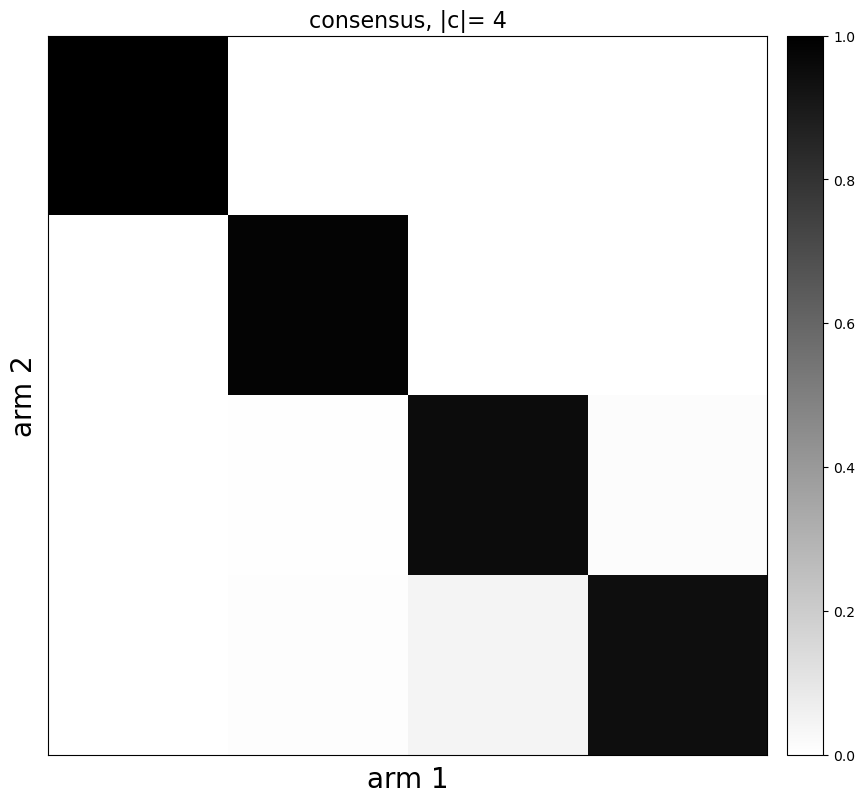

In [6]:
plt.figure(figsize=[10,10])
ax = plt.gca()
im = ax.imshow(outcome['consensus'][0], cmap='binary', vmax=1)
plt.xlabel('arm 1', fontsize=20)
plt.ylabel('arm 2', fontsize=20)
plt.xticks([])
plt.yticks([])
plt.title('consensus, |c|= ' + str(outcome['consensus'][0].shape[0]), fontsize=16)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)

In [7]:
data['supertype_scANVI'] = np.array(data['supertype_scANVI'])
# T_class = np.unique(data['supertype_scANVI'])
uniq_labels = np.unique(data['label'])
color = ['#ADE6A6', '#B8FFCA', '#82AD7D', '#A6E6A9', '#7AE6AB', '#D9F077',
       '#00979D', '#00A79D', '#008F1F', '#53879D', '#2F8C4D', '#33A9CE',
       '#0094C2', '#005C07', '#669D6A', '#00879D', '#00A809', '#26BF64',
       '#00FF00', '#00DDC5', '#26FFF2', '#3D9946', '#008F39', '#73CA95']
data['color'] = np.copy(data['cluster_color'])
uniq_clr, T_class, num_Tclass = [], [], []

for i_type, ttype in enumerate(uniq_labels):
    idx = np.where(data['label'] == ttype)[0]
    data['color'][idx] = color[i_type]
    uniq_clr.append(color[i_type])
    T_class.append(data['supertype_scANVI'][idx[0]])
    num_Tclass.append(len(idx))

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data['supertype_scANVI'])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
data['c_onehot'] = onehot_encoder.fit_transform(integer_encoded)
data['c_p'] = softmax((data['c_onehot'] + 1e-6) / 0.1, axis=1)

[1 2 3 0]
[1 2 3 0]


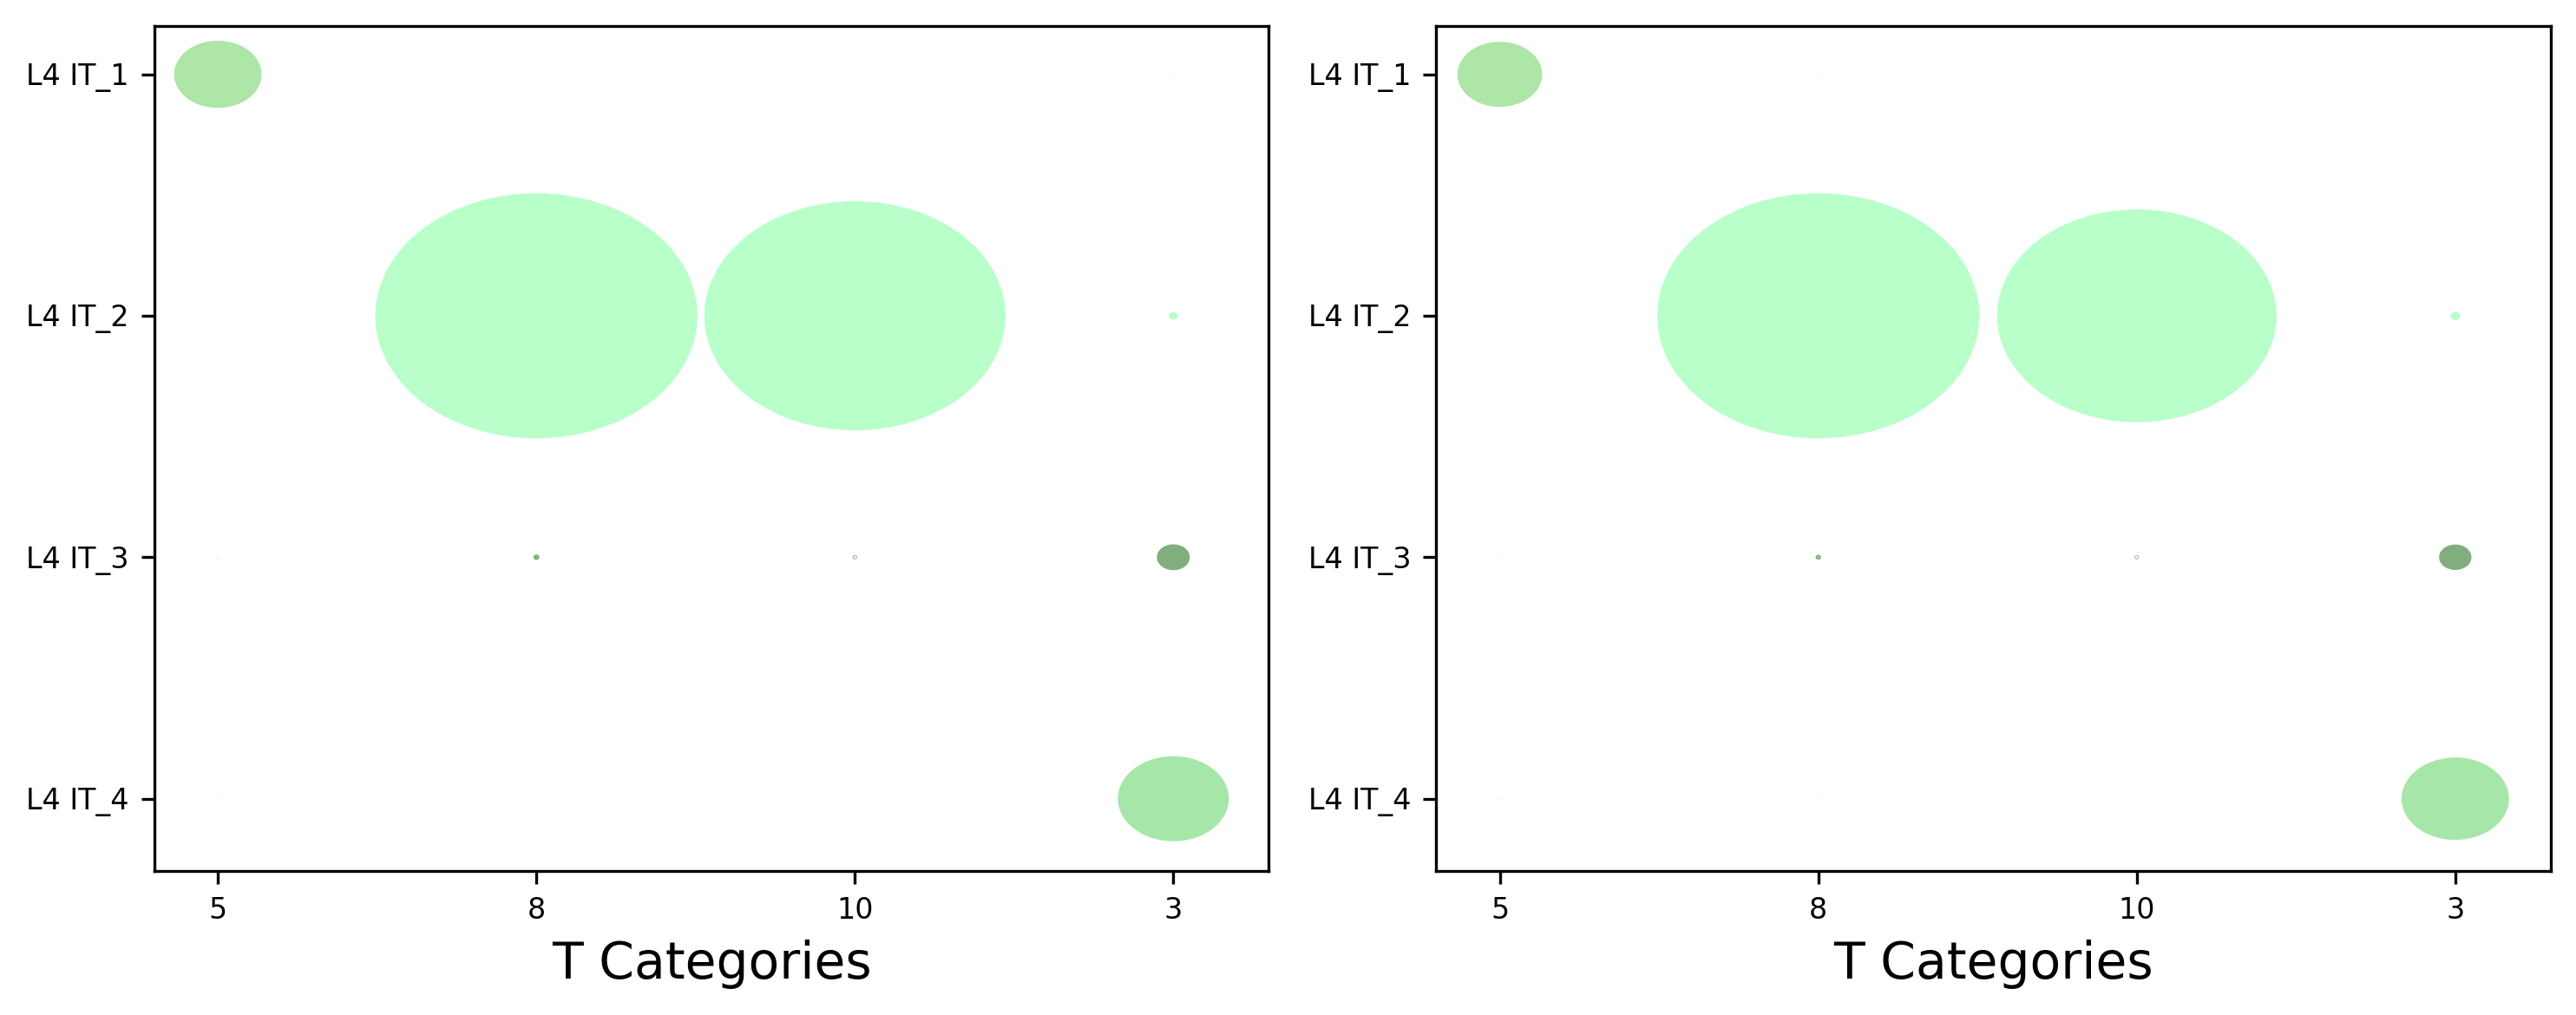

In [8]:
cT_vs_cT = outcome['cT_vs_cT'][0]
confm = np.zeros((n_arm, len(T_class), model_order))
fig, axs = plt.subplots(1, n_arm, figsize=(10, 4), dpi=300)
for arm in range(n_arm): 
    categories = np.unique(outcome['pred_label'][-1][arm]).astype(int)
    perform_mat = cT_vs_cT[arm, :, :]
    row_sum = perform_mat.sum(axis=1)
    confm[arm, :, :] = np.divide(perform_mat, row_sum[:, np.newaxis], 
                        out=np.zeros_like(perform_mat), 
                        where=row_sum[:, np.newaxis]!=0)
    row_ind, col_ind = linear_sum_assignment(1 - perform_mat)

    if model_order > len(T_class):
        not_used_cat = [a for a in range(model_order) if a not in list(col_ind)]
        cat_indx = np.concatenate((col_ind, np.array(not_used_cat)))
    else:
        cat_indx = col_ind
    print(cat_indx)
#     sort_idx = [np.argsort(perform_mat[it, :])[::-1] for it in range(len(T_class))]  
#     sort_idx = np.vstack(sort_idx).astype(int)
#     max_c_ind = -1 * np.ones(model_order) #sort_idx[:,0]
#     if model_order > len(T_class):
#         not_used_cat = [a for a in range(model_order) if a not in sort_idx[:,0]]
#         for cc in not_used_cat:
#             colm = np.argmax(perform_mat[:, cc].astype(int))
#             find_indx = np.where(sort_idx[colm,0] == sort_idx[:,0])[0][0]
#             max_c_ind[find_indx+1] = cc
#         max_c_ind[max_c_ind==-1] = sort_idx[:,0]
#         cat_indx = max_c_ind.astype(int)
#     else:
#         cat_indx = sort_idx[:, 0]

    mtx = perform_mat[:, cat_indx] / np.max(perform_mat[:, cat_indx]) / 2
    for l in range(len(T_class)):
        for col in range(model_order):
            xy = np.array([col, l])
            axs[arm].add_patch(plt.Circle(xy, radius=(mtx[l, col]), color=color[l]))
    axs[arm].set_xlim([-.2, model_order-.7])
    axs[arm].set_ylim([-.2, len(T_class)-.7])
    axs[arm].invert_yaxis()
    axs[arm].set_yticks(np.arange(len(T_class)))
    axs[arm].set_xticks(np.arange(model_order))
    axs[arm].set_yticklabels(T_class, fontsize=8)
    axs[arm].set_xticklabels(categories[cat_indx], fontsize=8)
    axs[arm].set_xlabel('T Categories', fontsize=14)
#     axs[0].set_ylabel('Supertypes', fontsize=14)


fig.tight_layout()
plt.savefig(saving_folder + '/categorical_rep_K_' + str(model_order) + '.png', dpi=600)

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


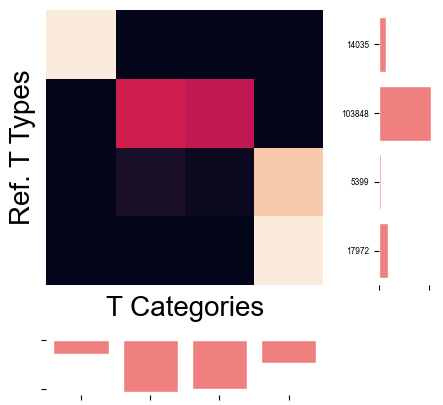

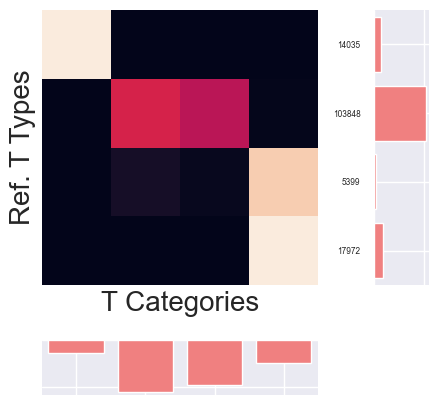

In [9]:
for arm in range(n_arm):
    fig = plt.figure(figsize=(5, 5), dpi=100)
    grid = plt.GridSpec(4, 4, hspace=1, wspace=1)
    ax_main = fig.add_subplot(grid[:-1, :-1])
    ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[])
    ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
    sns.set(font_scale=1.)
    sns.heatmap(np.squeeze(confm[arm, :, cat_indx].T), vmin=0, xticklabels=[], yticklabels=[], vmax=1, ax=ax_main, cbar=False)
    ax_main.set_ylabel('Ref. T Types', fontsize=20)
    ax_main.set_xlabel('T Categories', fontsize=20)
    ax_main.set_yticklabels(ax_main.get_yticklabels())

    # histogram on the right
    perform_mat = cT_vs_cT[arm, :, :]
    ax_bottom.bar(np.arange(model_order), np.sum(perform_mat[:, cat_indx], axis=0), color='lightcoral')
    # ax_bottom.set_ylim([0, 300])
    ax_bottom.invert_yaxis()
    ax_bottom.set_xlim([-.5, model_order-.5])
    ax_bottom.spines['top'].set_visible(False)
    ax_bottom.spines['right'].set_visible(False)
    ax_bottom.spines['bottom'].set_visible(False)
    ax_bottom.spines['left'].set_visible(False)

    # histogram in the bottom
    ax_right.barh(np.arange(len(T_class)), np.sum(perform_mat[:, cat_indx], axis=1).T, color='lightcoral')
    ax_right.set_ylim([-.5, len(T_class)-.5])
    # ax_right.set_xlim([0, 300])
    ax_right.set_yticks(np.arange(len(T_class)))
    ax_right.invert_yaxis()
    ax_right.set_yticklabels(np.sum(perform_mat[:, cat_indx], axis=1).astype(int), fontsize=6)
    ax_right.spines['top'].set_visible(False)
    ax_right.spines['right'].set_visible(False)
    ax_right.spines['bottom'].set_visible(False)
    ax_right.spines['left'].set_visible(False)

    fig.tight_layout()
    plt.savefig(saving_folder + '/confmax_K_' + str(model_order) + '_arm_' + str(arm) + '.png', dpi=600)


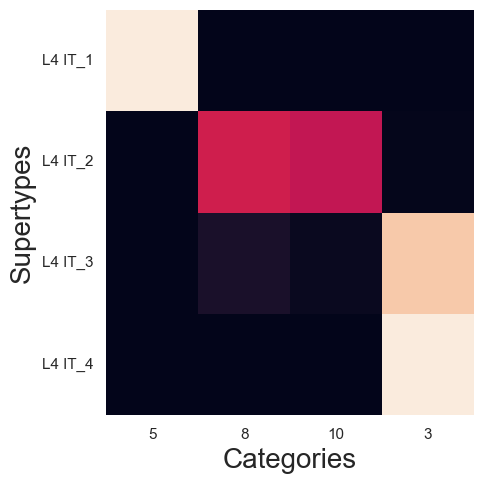

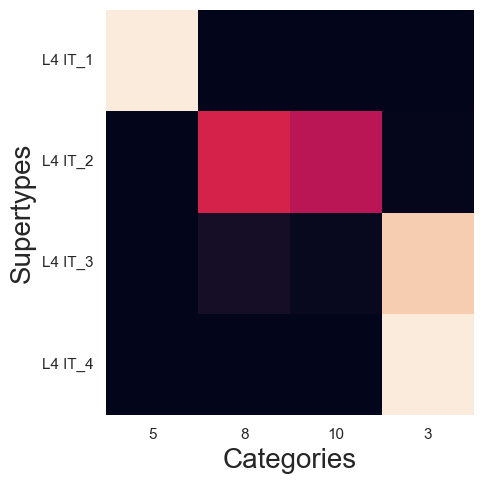

In [10]:
for arm in range(n_arm):
    fig = plt.figure(figsize=(5, 5), dpi=100)
    ax = fig.add_subplot()
    sns.set(font_scale=1.)
    sns.heatmap(np.squeeze(confm[arm, :, cat_indx].T), vmin=0, xticklabels=categories[cat_indx], 
                yticklabels=T_class, vmax=1, ax=ax, cbar=False)
    plt.yticks(rotation=0) 
    ax.set_ylabel('Supertypes', fontsize=20)
    ax.set_xlabel('Categories', fontsize=20)
    fig.tight_layout()
    plt.savefig(saving_folder + '/confmax_' + subclass + '_arm_' + str(arm) + '.png', dpi=600)

loading AD L4-IT data ... 
Data is loaded
['L4 IT_1' 'L4 IT_2' 'L4 IT_3' 'L4 IT_4']
['UWA 6948' 'UWA 6962' 'UWA 6965' 'UWA 6966' 'UWA 6967' 'UWA 6983'
 'UWA 6989' 'UWA 6991' 'UWA 6992' 'UWA 6993' 'UWA 6997' 'UWA 6999'
 'UWA 7000' 'UWA 7017' 'UWA 7027' 'UWA 7028' 'UWA 7038' 'UWA 7041'
 'UWA 7043' 'UWA 7045' 'UWA 7048' 'UWA 7049' 'UWA 7051' 'UWA 7055'
 'UWA 7056' 'UWA 7058' 'UWA 7063' 'UWA 7064' 'UWA 7065' 'UWA 7067'
 'UWA 7100' 'UWA 7101' 'UWA 7113' 'UWA 7117' 'UWA 7119' 'UWA 7120'
 'UWA 7124' 'UWA 7128' 'UWA 7129' 'UWA 7136' 'UWA 7138' 'UWA 7144'
 'UWA 7146' 'UWA 7150' 'UWA 7152' 'UWA 7153' 'UWA 7157' 'UWA 7159'
 'UWA 7161' 'UWA 7163' 'UWA 7170' 'UWA 7175' 'UWA 7179' 'UWA 7181'
 'UWA 7182' 'UWA 7183' 'UWA 7184' 'UWA 7186' 'UWA 7188' 'UWA 7197'
 'UWA 7227' 'UWA 7237' 'UWA 7239' 'UWA 7240' 'UWA 7244' 'UWA 7245'
 'UWA 7251' 'UWA 7264' 'UWA 7267' 'UWA 7268' 'UWA 7285' 'UWA 7288'
 'UWA 7290' 'UWA 7291' 'UWA 7297' 'UWA 7303' 'UWA 7317' 'UWA 7322'
 'UWA 7323' 'UWA 7370' 'UWA 7374' 'UWA 7377' 

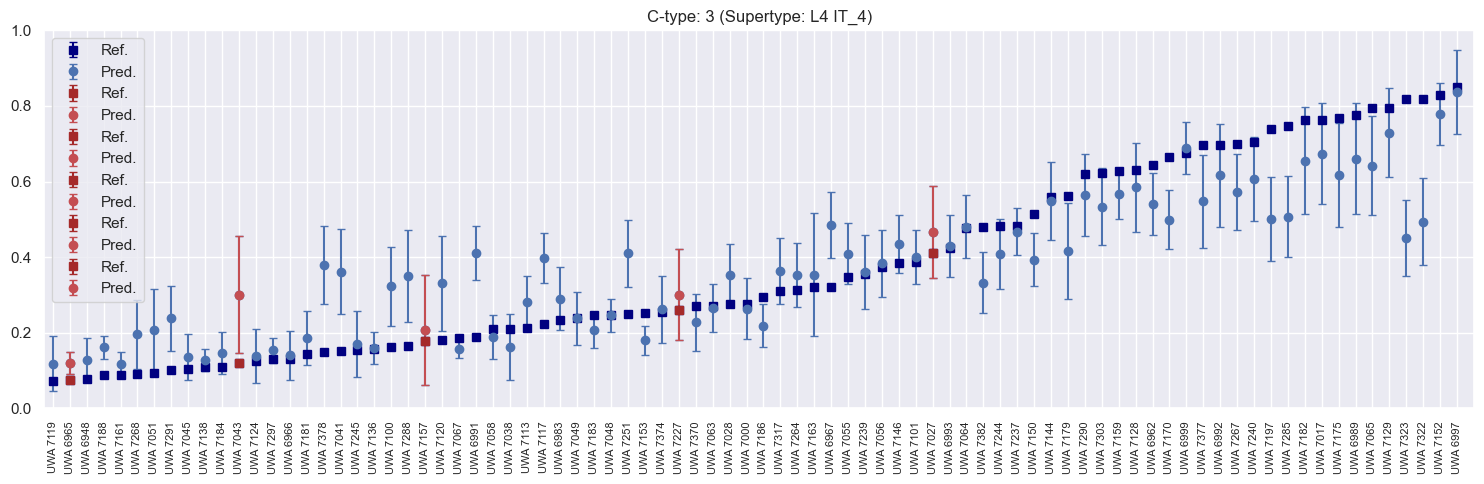

Pearsons correlation: 0.904
5.0
5.0 0
using CPU ...
Total loss: 0.018547914340160787


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Total loss: 0.017959370277822018
Total loss: 0.01863777486141771
Total loss: 0.018932640203274786
Total loss: 0.018340411828830838
Total loss: 0.016174325544852763
Total loss: 0.018740799045190215
Total loss: 0.016359083587303758
Total loss: 0.017463663942180574
Total loss: 0.017347425338812172


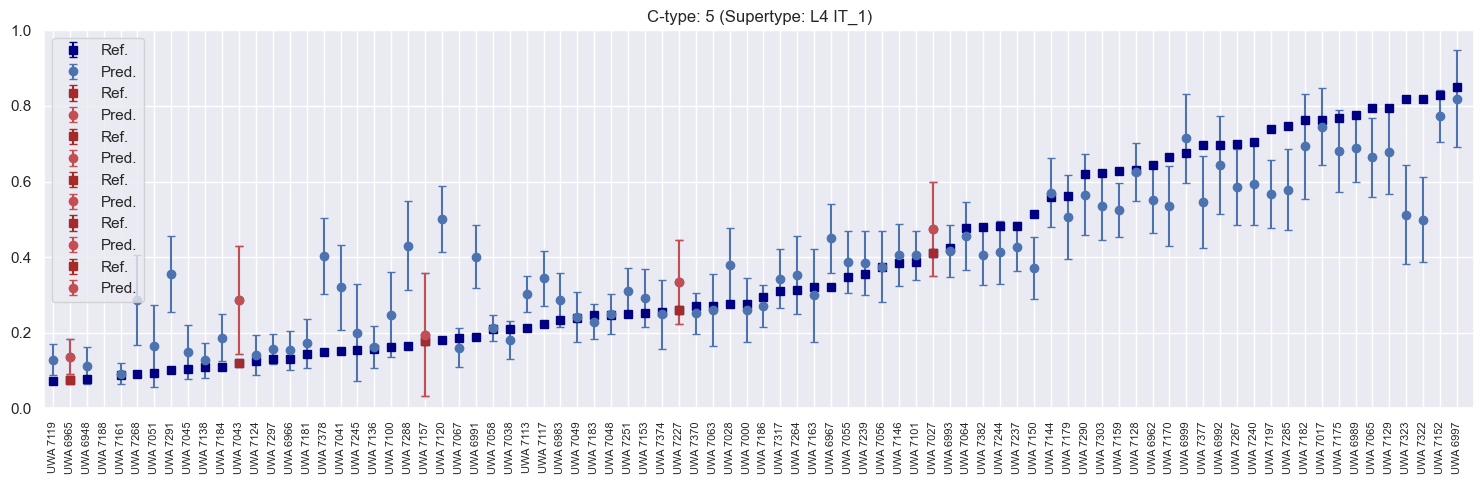

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.995
8.0
8.0 1
using CPU ...
Total loss: 0.010204191564116626
Total loss: 0.011408439556059117
Total loss: 0.010059638100210577
Total loss: 0.010240601579425856
Total loss: 0.010300942095151791
Total loss: 0.010257260278255369
Total loss: 0.00943860568998692
Total loss: 0.010686917092728739
Total loss: 0.009565104540282239
Total loss: 0.01106869252010559


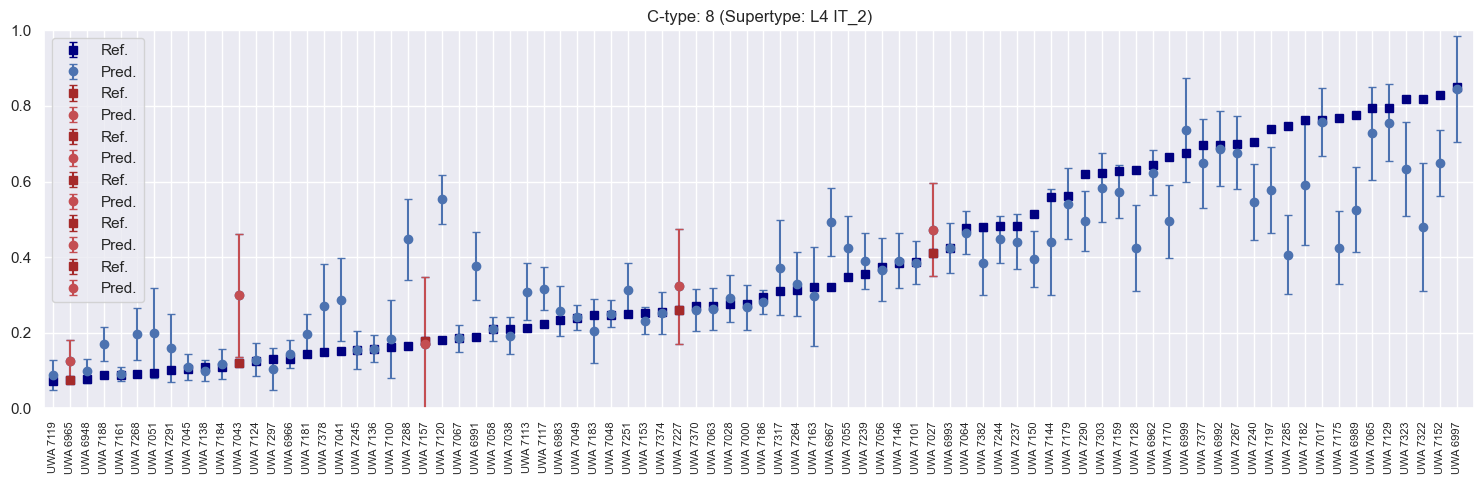

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.889
10.0
10.0 1
using CPU ...
Total loss: 0.012604670098948258
Total loss: 0.013414467305496888
Total loss: 0.014718745817878732
Total loss: 0.012793772146795635
Total loss: 0.012595669262939028
Total loss: 0.01312562000627319
Total loss: 0.014205641854830362
Total loss: 0.01486714163588153
Total loss: 0.013890713798227134
Total loss: 0.013409397513088252


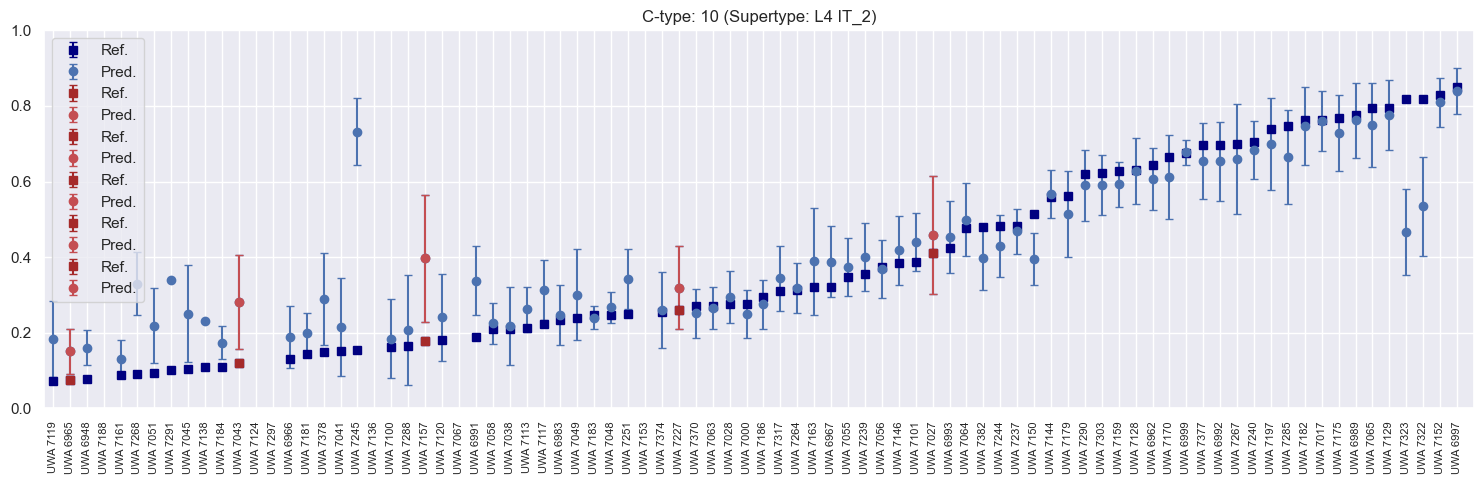

Pearsons correlation: 0.999


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

In [11]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
import pandas as pd

folder_name = f'{subclass}_exc{n_donor}Don_run_{n_run}_K_{n_categories}_Sdim_{state_dim}_ngene_{n_gene}_fcDim_{fc_dim}_latDim_{latent_dim}_lr_{lr}_pDrop_{p_drop}_n_arm_{n_arm}_tau_{tau}_bsize_{batch_size}_nepoch_{n_epoch}_nepochP_{n_epoch_p}'
saving_folder = path + "/results/cpl_mixVAE/"
saving_folder = saving_folder + str(folder_name)

cpl_mixVAE, data, outcome = eval_mixmodel(n_categories=n_categories, 
                           state_dim=state_dim, 
                           n_arm=n_arm,
                           latent_dim=latent_dim,
                           fc_dim=fc_dim,
                           tau=tau,
                           subclass=subclass,
                           saving_folder=saving_folder, 
                           data_path=data_path,
                           device=device,
                           all_data=True,
                           models=[selected_model])

arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'ps_time'
    
uniq_score = np.unique(data[metadata])
uniq_donor = np.array([data['external_donor_name'][data[metadata]==u_m][0] for u_m in uniq_score])

df_ps_time = pd.DataFrame()
df_ps_time['c'] = np.zeros(len(cat))
df_ps_time['superype'] = np.zeros(len(cat))
df_ps_time['pearson_corr'] = np.zeros(len(cat))
df_ps_time['p_val'] = np.zeros(len(cat))
df_ps_time['r2'] = np.zeros(len(cat))
df_ps_time['mse'] = np.zeros(len(cat))
        
for i_c, c in enumerate(cat):
    print(c)
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd}')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(10)
                meta_true_std.append(0)
                meta_pred_mean.append(10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)
        xtick = np.array(xtick)

        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.errorbar(x, meta_true_mean,  yerr = meta_true_std, linestyle='None',  marker='s', mfc='Navy',
        mec='Navy',  capsize=3,  ecolor='Navy', label='Ref.')
        plt.errorbar(x, meta_pred_mean,  yerr = meta_pred_std, linestyle='None',  fmt='ob',  capsize=3,  
                     ecolor='b', label='Pred.')
        plt.xticks(x, xtick, rotation=90, fontsize=8)
        
        for dd in exclude_donors:
            i_dd = np.where(xtick == dd)[0]
            plt.errorbar(x[i_dd], meta_true_mean[i_dd],  yerr=meta_true_std[i_dd], linestyle='None',  
                         marker='s', mfc='brown', mec='brown',  capsize=3,  ecolor='brown', label='Ref.')
            plt.errorbar(x[i_dd], meta_pred_mean[i_dd],  yerr=meta_pred_std[i_dd], linestyle='None',  
                         fmt='or',  capsize=3, ecolor='r', label='Pred.')
            
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([0., 1])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/ps_time_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_mean[meta_pred_mean > 0]
        y_true = meta_true_mean[meta_pred_mean > 0]
        df_ps_time['c'][i_c] = int(c)
        df_ps_time['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, p_val = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_ps_time['pearson_corr'][i_c] = corr
        df_ps_time['p_val'][i_c] = p_val
        df_ps_time['r2'][i_c] = r2_score(y_true, y_pred)
        df_ps_time['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [12]:
df_ps_time

,c,superype,pearson_corr,p_val,r2,mse
0,3.0,L4 IT_4,0.904433,4.458120e-32,0.787860,0.012707
1,5.0,L4 IT_1,0.994855,2.561852e-83,0.989674,0.011844
2,8.0,L4 IT_2,0.889327,1.341277e-29,0.774671,0.013497
3,10.0,L4 IT_2,0.999119,1.059713e-114,0.998134,0.011521


3.0
3.0 L4 IT_4
using CPU ...
Total loss: 0.018806197823813327
Total loss: 0.02091745989253888
Total loss: 0.0189735722871354
Total loss: 0.018692831365534894
Total loss: 0.017633496389652673
Total loss: 0.020161087839649275
Total loss: 0.019280054964698277
Total loss: 0.01844695400303373
Total loss: 0.019022530804459866
Total loss: 0.021025748207018927


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:125: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


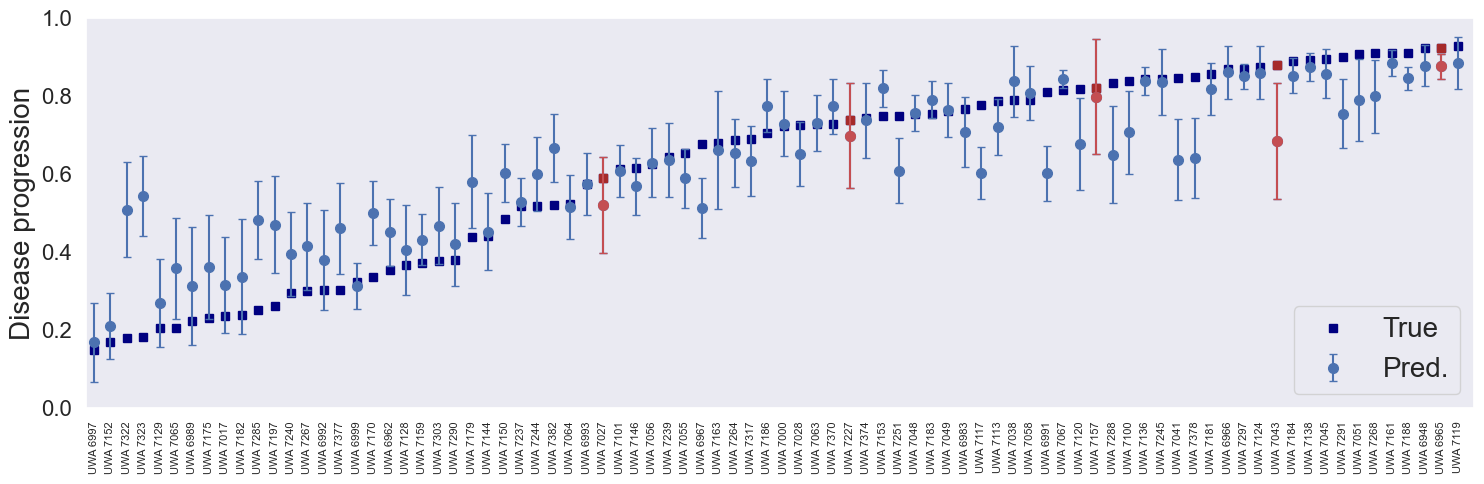

Pearsons correlation: 0.911
5.0


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

5.0 L4 IT_1
using CPU ...
Total loss: 0.01821606233716011
Total loss: 0.017928200541064143
Total loss: 0.01740054681431502
Total loss: 0.017769391881302
Total loss: 0.01875079667661339
Total loss: 0.015868960763327777
Total loss: 0.018749138922430575
Total loss: 0.016284723416902125
Total loss: 0.017033702810294926
Total loss: 0.019016477395780385


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:125: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


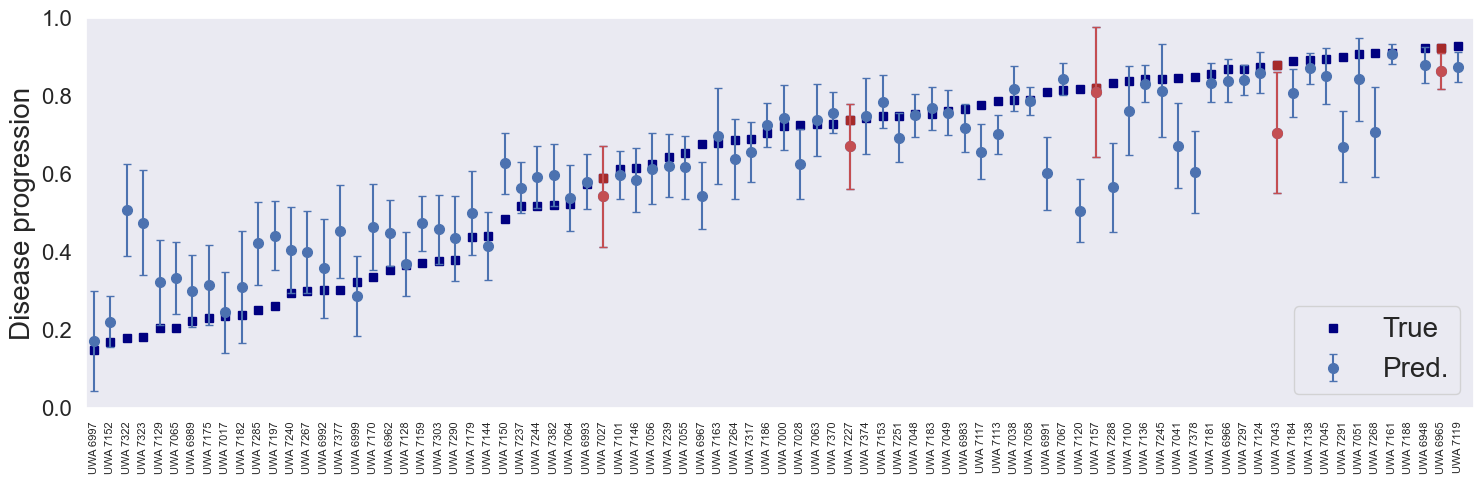

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.910
8.0
8.0 L4 IT_2
using CPU ...
Total loss: 0.011721567852267375
Total loss: 0.011193402354062224
Total loss: 0.009882089243425677
Total loss: 0.010310721543889182
Total loss: 0.010097069229232147
Total loss: 0.010027267213445157
Total loss: 0.009720846684649587
Total loss: 0.01086036790899622
Total loss: 0.009905170348550504
Total loss: 0.011156440685347964


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:125: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


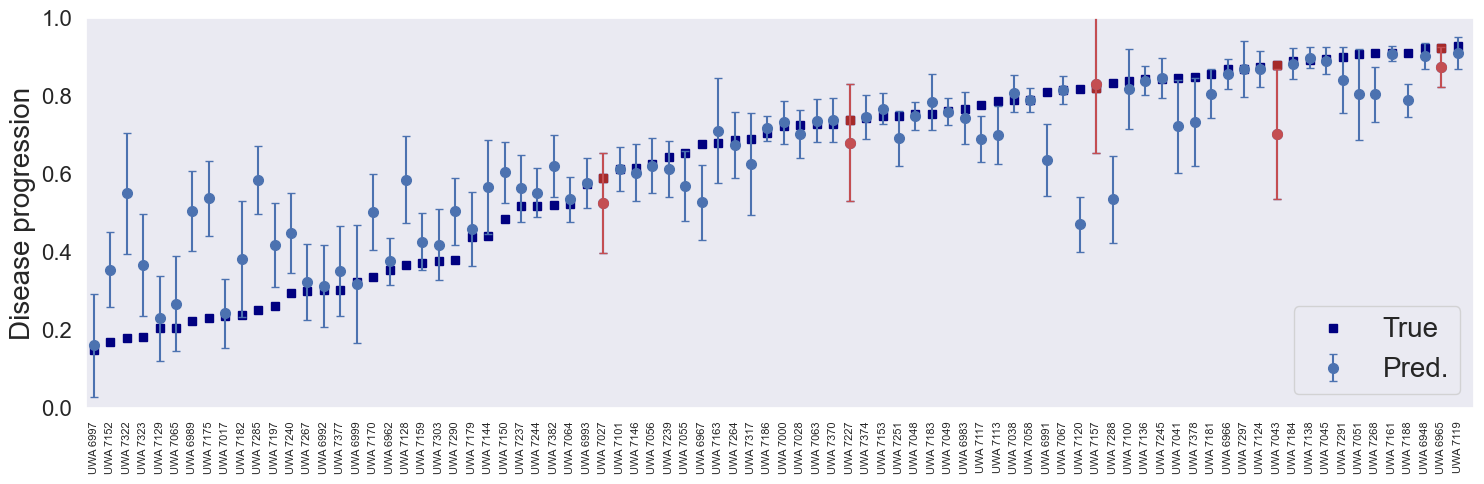

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.893
10.0
10.0 L4 IT_2
using CPU ...
Total loss: 0.012968512881478225
Total loss: 0.013521531113871822
Total loss: 0.01388256715748597
Total loss: 0.01297183310682023
Total loss: 0.012860853526810254
Total loss: 0.013476015404901572
Total loss: 0.01364629072378631
Total loss: 0.013842901404671095
Total loss: 0.014073051357020935
Total loss: 0.013929613141549958


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:125: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


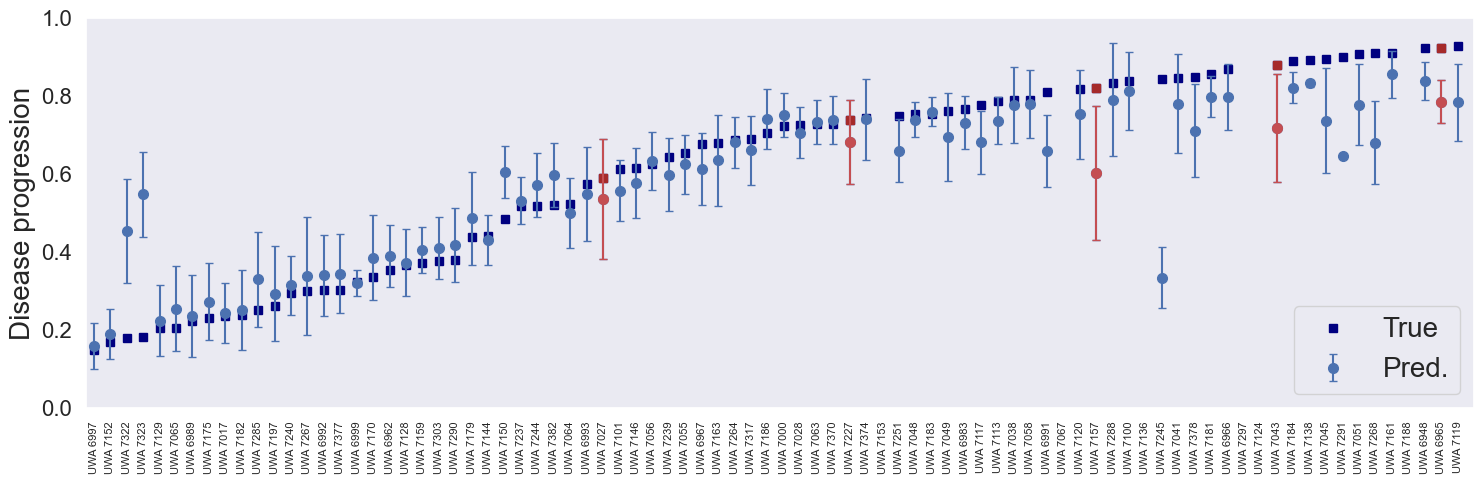

Pearsons correlation: 0.911


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

In [13]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
import pandas as pd


fontsize = 28
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'ps_time'
    
uniq_score = np.unique(data[metadata])
uniq_donor = np.array([data['external_donor_name'][data[metadata]==u_m][0] for u_m in uniq_score])

df_ps_time = pd.DataFrame()
df_ps_time['c'] = np.zeros(len(cat))
df_ps_time['supertype'] = np.zeros(len(cat))
df_ps_time['pearson_corr'] = np.zeros(len(cat))
df_ps_time['r2'] = np.zeros(len(cat))
df_ps_time['mse'] = np.zeros(len(cat))
df_ps_time['p_val'] = np.zeros(len(cat))

overall_cell_ps = []
don_dict = dict()
don_dict['donor'] = []
don_dict['pred_mu'] = []
don_dict['pred_std'] = []
don_dict['Ttype'] = []
don_dict['c'] = []
        
for i_c, c in enumerate(cat):
    print(c)
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, uniq_ref_t[np.argmax(norm_count)])
    x = state[idx, :]
    y = meta_y
    donors = tmp_donors
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            trained_model
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []
        num_cells = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            num_cells.append(len(d_idx))
            xtick.append(f'{dd}')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(10)
                meta_true_std.append(0)
                meta_pred_mean.append(10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)
        
        meta_true_mean = 1 - meta_true_mean
        meta_pred_mean = 1 - meta_pred_mean
        x = np.arange(len(uniq_donor))
        meta_true_mean = meta_true_mean[::-1]
        meta_pred_mean = meta_pred_mean[::-1]
        meta_pred_std = meta_pred_std[::-1]
        xtick = np.array(xtick)[::-1]
        plt.figure(figsize=[15, 5],dpi=100)
        plt.plot(x, meta_true_mean, linestyle='None',  marker='s', markersize=6, color='Navy', label='True')
        plt.errorbar(x, meta_pred_mean, yerr=meta_pred_std, linestyle='None',  fmt='ob',  
                     markersize=7, capsize=3,  ecolor='b', label='Pred.')
        
        plt.grid(b=None)
        plt.xticks(x, xtick, rotation=90, fontsize=8)
        plt.yticks(fontsize=16)
#         plt.xlabel('Donors', fontsize=fontsize-2)
        plt.ylabel('Disease progression',fontsize=20)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([0., 1])
        plt.legend(fontsize=20, loc='lower right')
        for dd in exclude_donors:
            i_dd = np.where(xtick == dd)[0]
            plt.plot(x[i_dd], meta_true_mean[i_dd], linestyle='None',  marker='s', 
                     markersize=6, color='brown', label='True')
            plt.errorbar(x[i_dd], meta_pred_mean[i_dd], yerr=meta_pred_std[i_dd], linestyle='None',  fmt='or',  
                         markersize=7, capsize=3,  ecolor='r', label='Pred.')
            don_dict['donor'].append(dd)
            don_dict['pred_mu'].append(meta_pred_mean[i_dd])
            don_dict['pred_std'].append(meta_pred_std[i_dd])
            don_dict['Ttype'].append(uniq_ref_t[np.argmax(norm_count)])
            don_dict['c'].append(c)
    
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/qs_time_' + str(int(c)) + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_mean[meta_pred_mean > 0]
        y_true = meta_true_mean[meta_pred_mean > 0]
        df_ps_time['c'][i_c] = int(c)
        df_ps_time['supertype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, p_val = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_ps_time['pearson_corr'][i_c] = corr
        df_ps_time['p_val'][i_c] = p_val
        df_ps_time['r2'][i_c] = r2_score(y_true, y_pred)
        df_ps_time['mse'][i_c] = np.mean((y_pred - y_true)**2)
        overall_cell_ps.append(np.array(num_cells))

f = open(saving_folder + f'/middle_exclude_donors.p', "wb")
pickle.dump(don_dict, f)
f.close()

5.0
5.0 L4 IT_2
using CPU ...
Total loss: 0.009917438152894777
Total loss: 0.010596409868282666
Total loss: 0.00939942377798226
Total loss: 0.009667911832886083
Total loss: 0.009275002879024084
Total loss: 0.009364203138310196
Total loss: 0.009719161167075592
Total loss: 0.00930963976341965
Total loss: 0.009037986950716004
Total loss: 0.009832655441381835


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:125: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


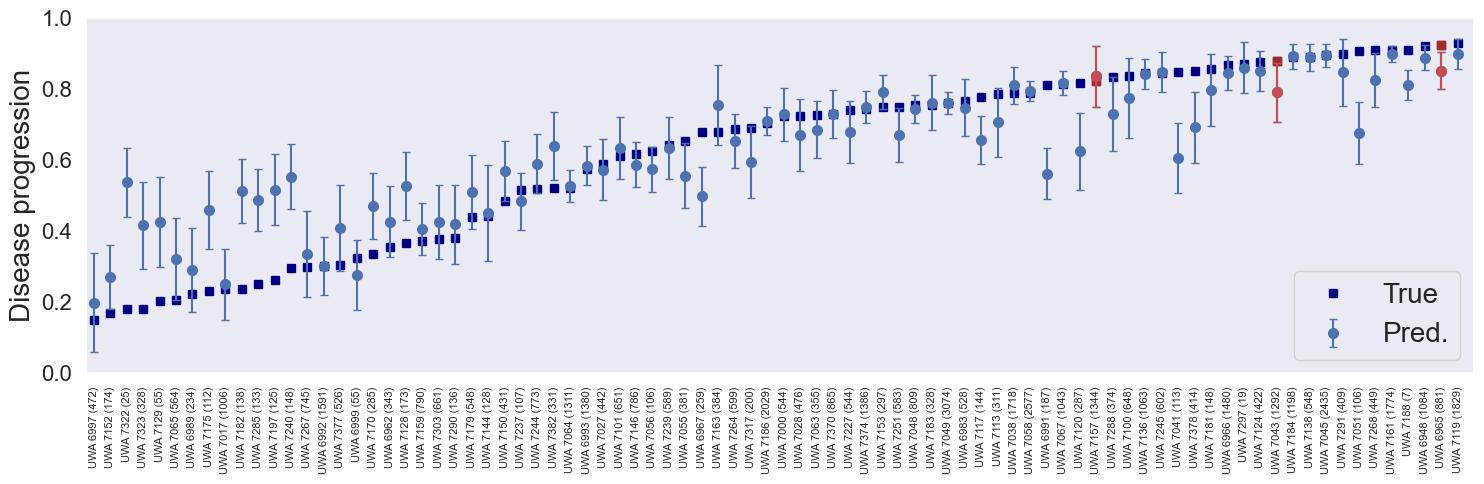

Pearsons correlation: 0.903
7.0


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

7.0 L4 IT_2
using CPU ...
Total loss: 0.01297440508746409
Total loss: 0.015542193582015378
Total loss: 0.014033258693026645
Total loss: 0.014085966944029289
Total loss: 0.014613728787350868
Total loss: 0.015036154646492963
Total loss: 0.013463554637772697
Total loss: 0.014649580615306539
Total loss: 0.014791627314739994
Total loss: 0.015514623024500906


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:125: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


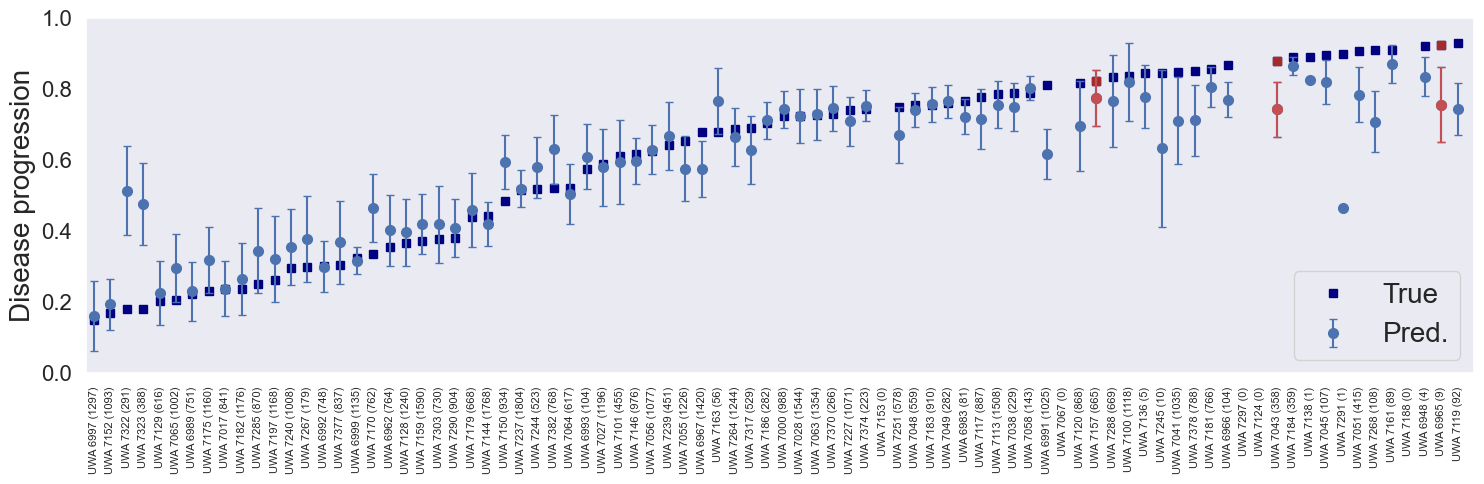

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.921
8.0
8.0 L4 IT_1
using CPU ...
Total loss: 0.019154248875565827
Total loss: 0.020572417182847857
Total loss: 0.01727711851708591
Total loss: 0.020148231531493366
Total loss: 0.019305510562844574
Total loss: 0.019479909213259816
Total loss: 0.018659512337762862
Total loss: 0.018906375276856124
Total loss: 0.017710956162773073
Total loss: 0.017619668215047568


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:125: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


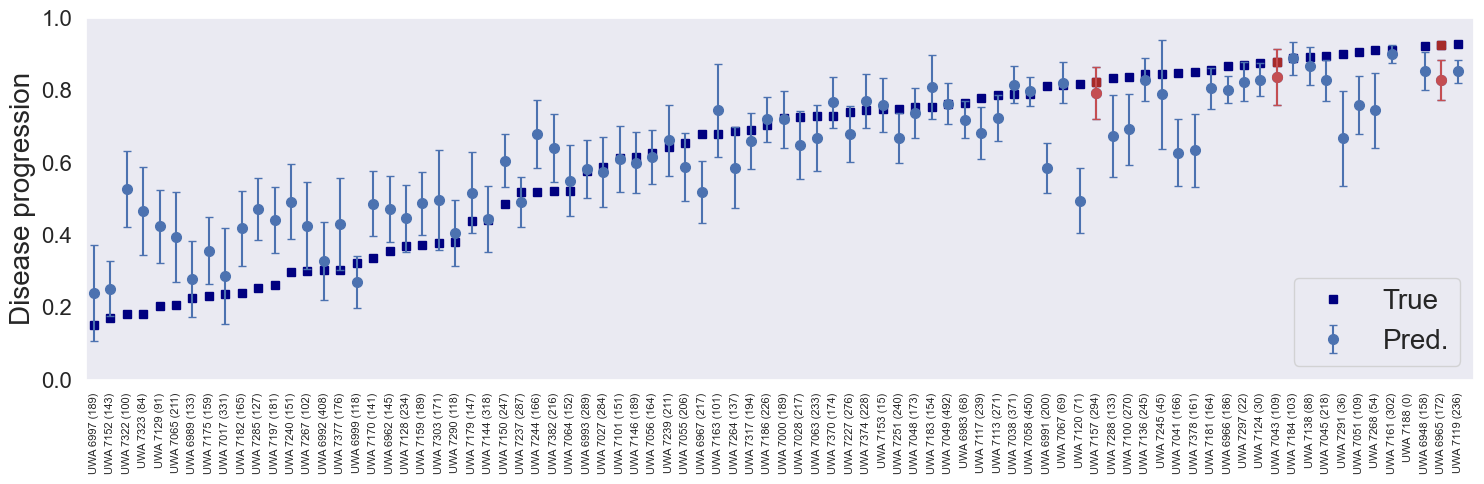

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.896
10.0
10.0 L4 IT_4
using CPU ...
Total loss: 0.01942824449257127
Total loss: 0.01919582415471918
Total loss: 0.01858019078749099
Total loss: 0.018170662889523164
Total loss: 0.01810414593533746
Total loss: 0.017753563171676694
Total loss: 0.01687455757304893
Total loss: 0.018658776646978886
Total loss: 0.01869528358136969
Total loss: 0.01845666287408676


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:125: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


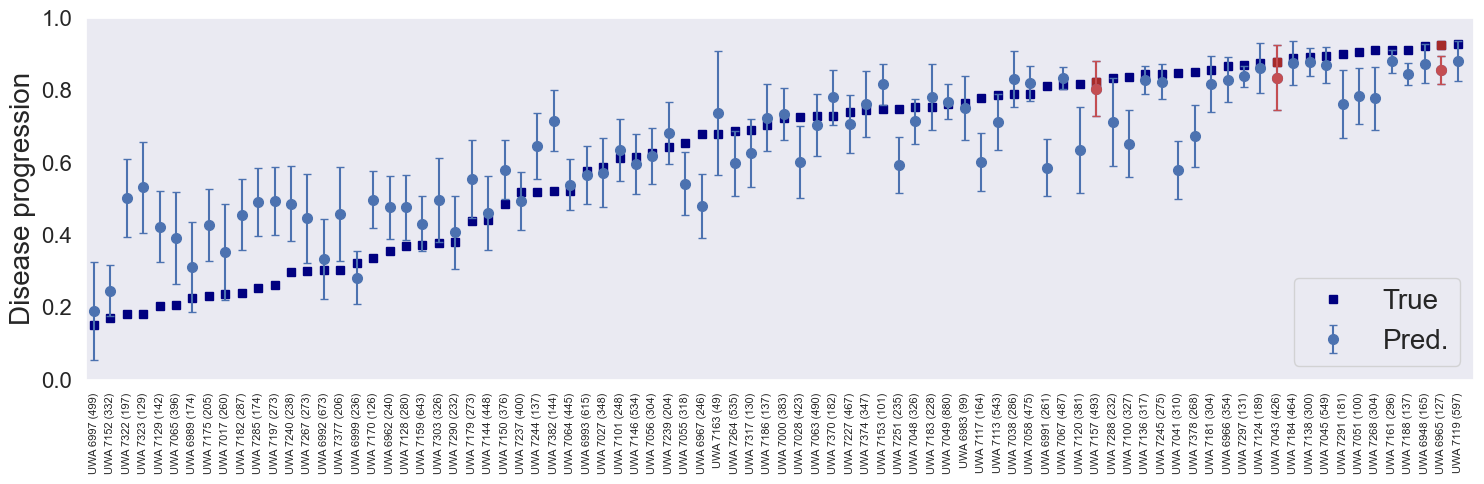

Pearsons correlation: 0.889


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

In [51]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
import pandas as pd


fontsize = 28
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'ps_time'
    
uniq_score = np.unique(data[metadata])
uniq_donor = np.array([data['external_donor_name'][data[metadata]==u_m][0] for u_m in uniq_score])

df_ps_time = pd.DataFrame()
df_ps_time['c'] = np.zeros(len(cat))
df_ps_time['supertype'] = np.zeros(len(cat))
df_ps_time['pearson_corr'] = np.zeros(len(cat))
df_ps_time['r2'] = np.zeros(len(cat))
df_ps_time['mse'] = np.zeros(len(cat))
df_ps_time['p_val'] = np.zeros(len(cat))

overall_cell_ps = []
        
for i_c, c in enumerate(cat):
    print(c)
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, uniq_ref_t[np.argmax(norm_count)])
    x = state[idx, :]
    y = meta_y
    donors = tmp_donors
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            trained_model
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []
        xticks = []
        num_cells = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            num_cells.append(len(d_idx))
            xticks.append(f'{dd} ({len(d_idx)})')
            xtick.append(f'{dd}')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(10)
                meta_true_std.append(0)
                meta_pred_mean.append(10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)
        
        meta_true_mean = 1 - meta_true_mean
        meta_pred_mean = 1 - meta_pred_mean
        x = np.arange(len(uniq_donor))
        meta_true_mean = meta_true_mean[::-1]
        meta_pred_mean = meta_pred_mean[::-1]
        meta_pred_std = meta_pred_std[::-1]
        xtick = np.array(xtick)[::-1]
        xticks = np.array(xticks)[::-1]
        plt.figure(figsize=[15, 5],dpi=100)
#         plt.errorbar(x, meta_true_mean[::-1],  yerr = 0. * meta_true_std[::-1], linestyle='None',  marker='s', markersize=3,
#                      mfc='Navy', mec='Navy',  capsize=1,  ecolor='Navy', label='DP')
        plt.plot(x, meta_true_mean, linestyle='None',  marker='s', markersize=6, color='Navy', label='True')
        plt.errorbar(x, meta_pred_mean, yerr=meta_pred_std, linestyle='None',  fmt='ob',  
                     markersize=7, capsize=3,  ecolor='b', label='Pred.')
        
            
        plt.grid(b=None)
        plt.xticks(x, xticks, rotation=90, fontsize=8)
        plt.yticks(fontsize=16)
#         plt.xlabel('Donors', fontsize=fontsize-2)
        plt.ylabel('Disease progression',fontsize=20)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([0., 1])
        plt.legend(fontsize=20, loc='lower right')
        for dd in exclude_donors:
            i_dd = np.where(xtick == dd)[0]
            plt.plot(x[i_dd], meta_true_mean[i_dd], linestyle='None',  marker='s', 
                     markersize=6, color='brown', label='True')
            plt.errorbar(x[i_dd], meta_pred_mean[i_dd], yerr=meta_pred_std[i_dd], linestyle='None',  fmt='or',  
                         markersize=7, capsize=3,  ecolor='r', label='Pred.')
    
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/qs_time_' + str(int(c)) + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_mean[meta_pred_mean > 0]
        y_true = meta_true_mean[meta_pred_mean > 0]
        df_ps_time['c'][i_c] = int(c)
        df_ps_time['supertype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, p_val = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_ps_time['pearson_corr'][i_c] = corr
        df_ps_time['p_val'][i_c] = p_val
        df_ps_time['r2'][i_c] = r2_score(y_true, y_pred)
        df_ps_time['mse'][i_c] = np.mean((y_pred - y_true)**2)
        overall_cell_ps.append(np.array(num_cells))


In [105]:
df_c_per_c_group

donor    c            qc_0           qc_1            ...      qc_7  \
             mean   sum  std mean  sum  std mean  sum  std  ...       std   
0   UWA 6948  7.0    28  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.008073   
1   UWA 6962  7.0  5348  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.011061   
2   UWA 6965  7.0    63  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.010939   
3   UWA 6966  7.0   728  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.012352   
4   UWA 6967  7.0  9940  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.011031   
..       ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
74  UWA 7370  7.0  1862  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.010528   
75  UWA 7374  7.0  1561  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.009991   
76  UWA 7377  7.0  5859  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.011737   
77  UWA 7378  7.0  5516  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.011677   
78  UWA 7382  7.0  5376  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.009711   

   qc_8                qc_9                              ps                   
   mean  sum  std      mean         sum       std      mean         sum  std  
0   0.0  0.0  0.0  0.127640    0.510560  0.022659  0.077646    0.310584  0.0  
1   0.0  0.0  0.0  0.156249  119.374168  0.033994  0.644368  492.297241  0.0  
2   0.0  0.0  0.0  0.153668    1.383014  0.031772  0.075935    0.683419  0.0  
3   0.0  0.0  0.0  0.161992   16.847156  0.038322  0.131617   13.688203  0.0  
4   0.0  0.0  0.0  0.145905  207.184554  0.031946  0.321723  456.846598  0.0  
..  ...  ...  ...       ...         ...       ...       ...         ...  ...  
74  0.0  0.0  0.0  0.158202   42.081682  0.033716  0.270668   71.997696  0.0  
75  0.0  0.0  0.0  0.148403   33.093844  0.031930  0.255482   56.972511  0.0  
76  0.0  0.0  0.0  0.148808  124.552119  0.033939  0.696249  582.760064  0.0  
77  0.0  0.0  0.0  0.158529  124.920590  0.036043  0.149935  118.148849  0.0  
78  0.0  0.0  0.0  0.149157  114.552316  0.032150  0.479653  368.373775  0.0  

[79 rows x 37 columns]

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed

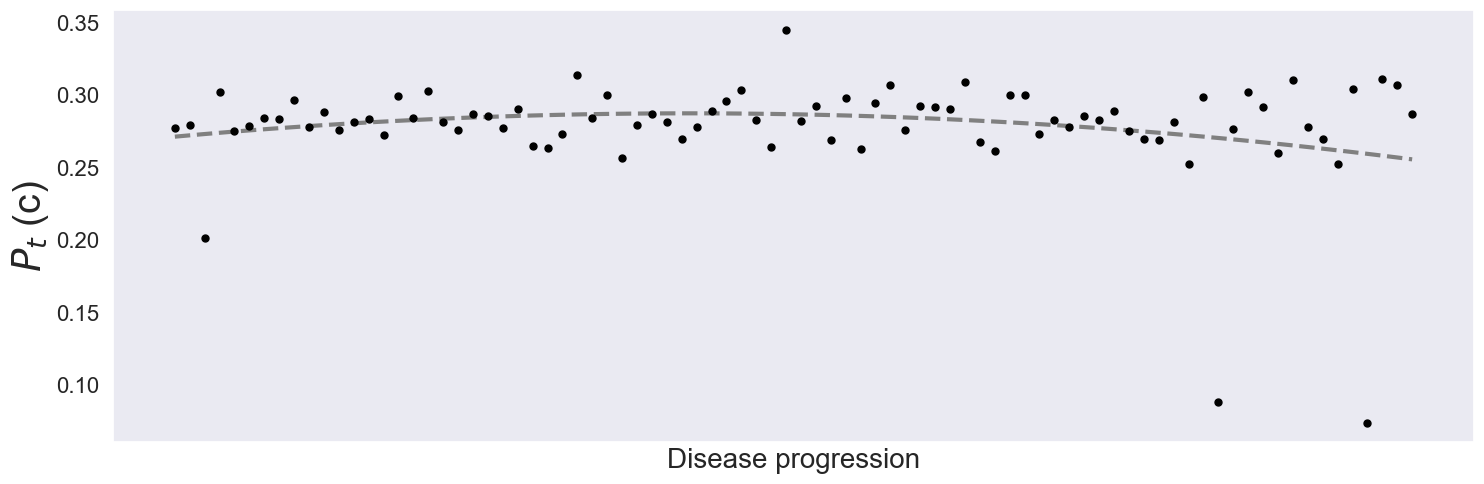

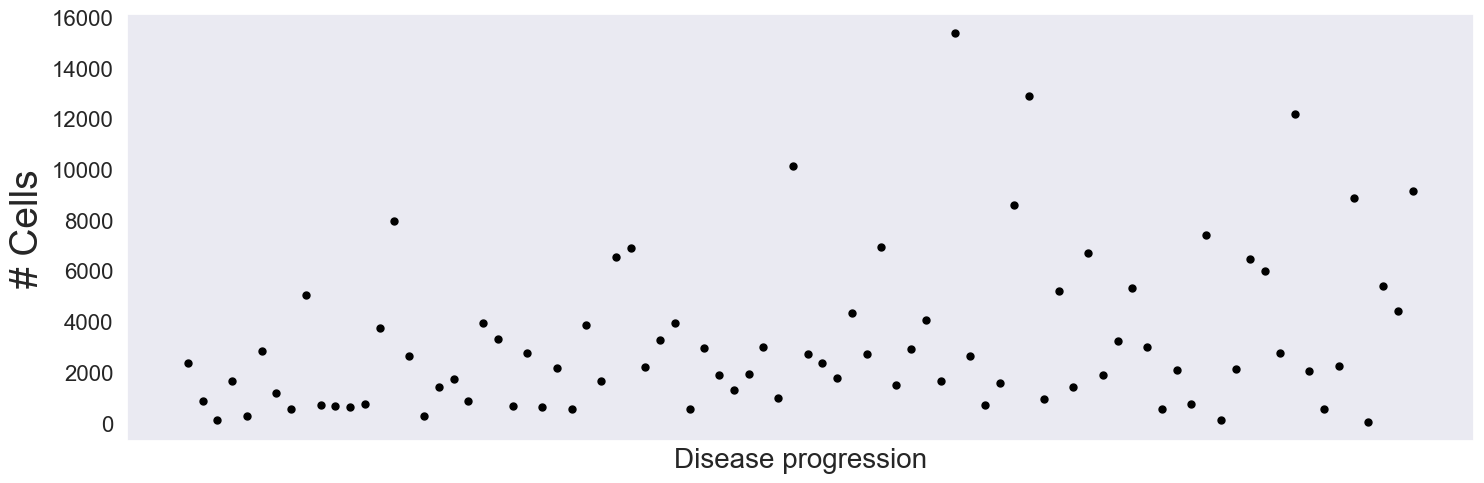

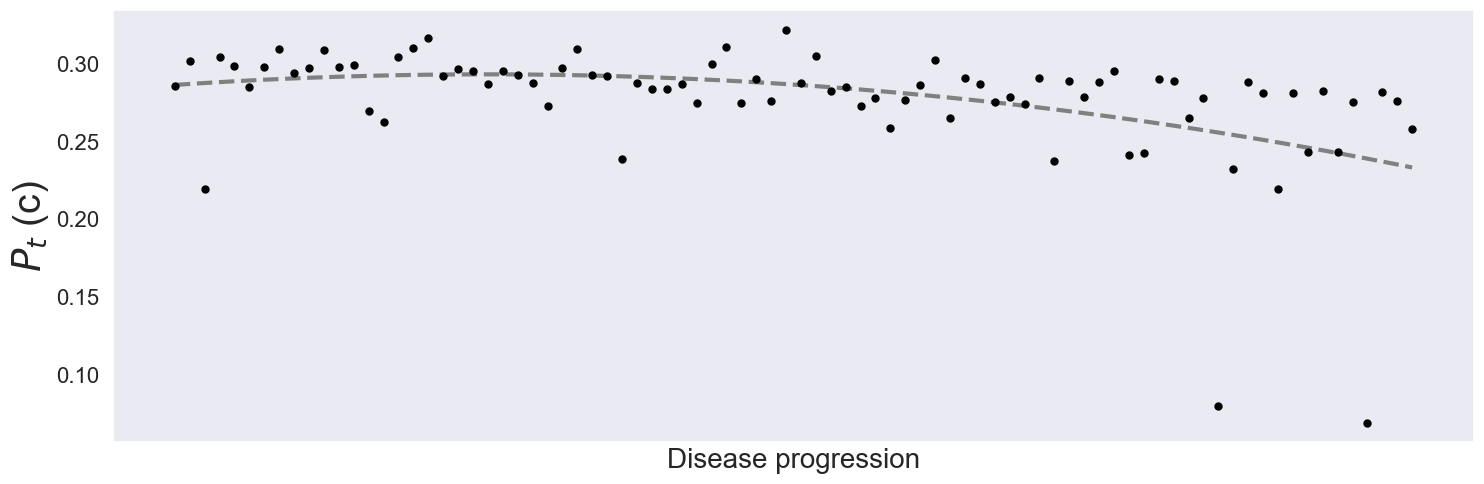

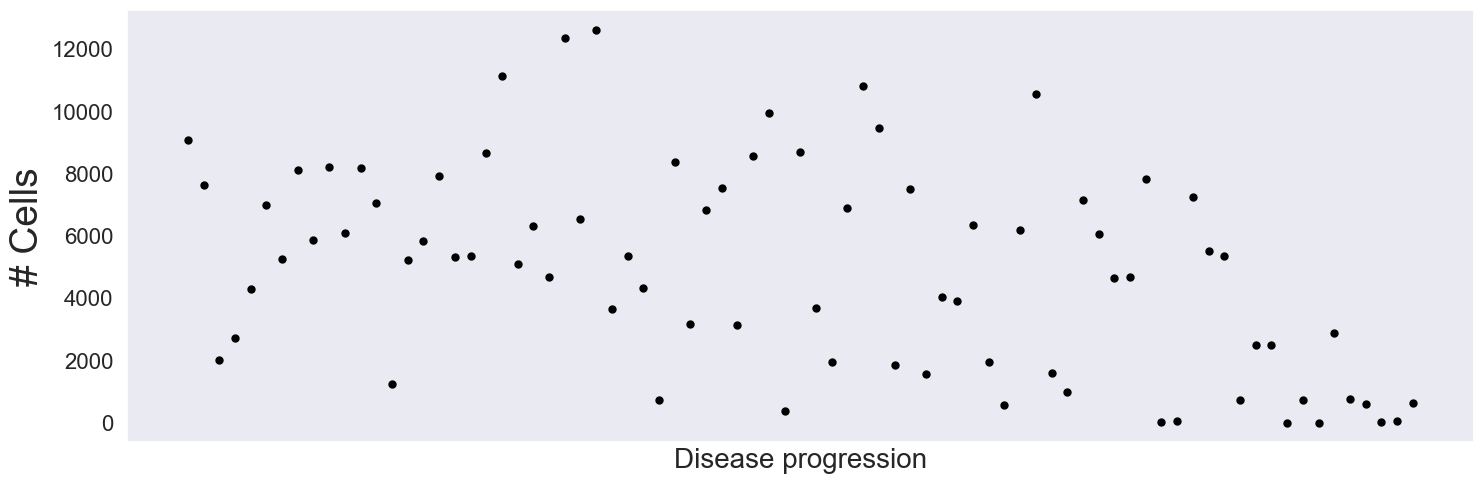

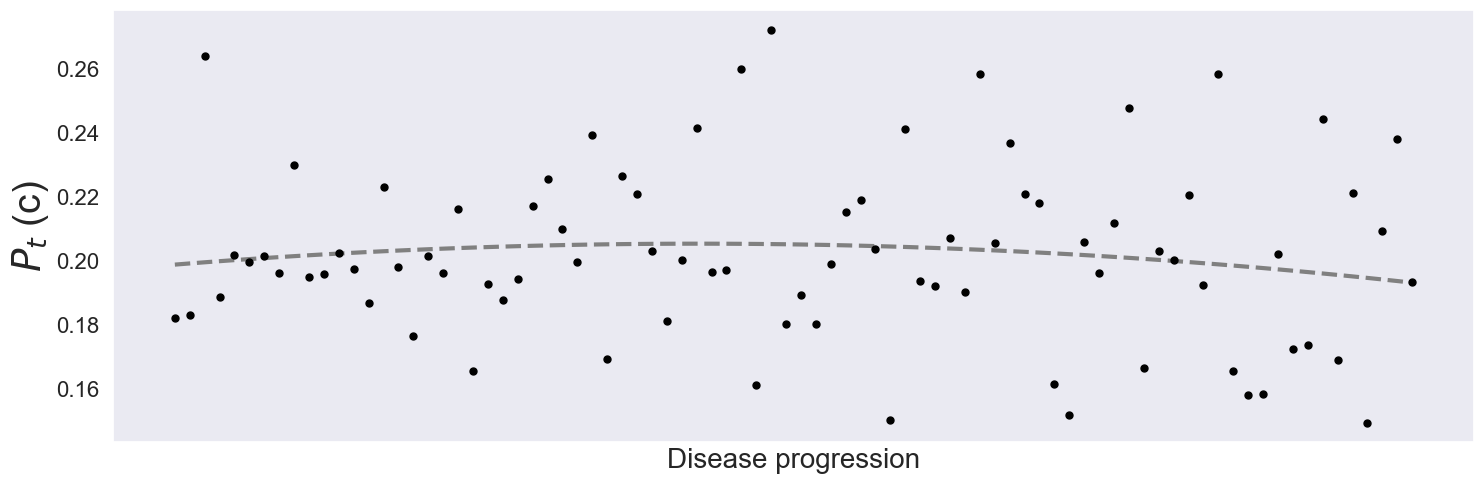

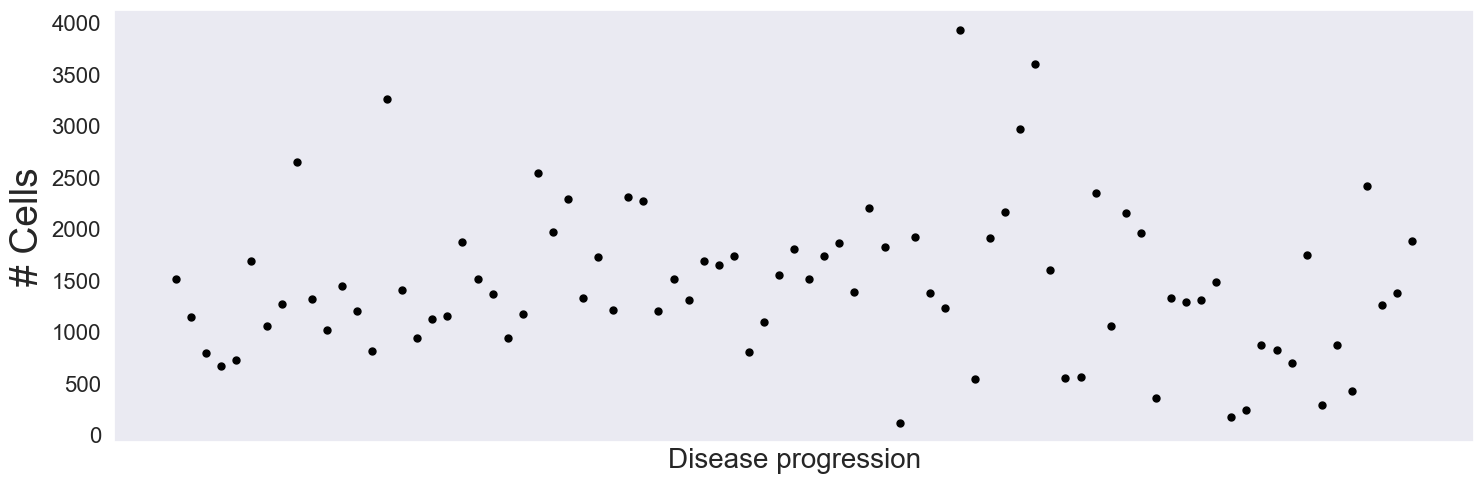

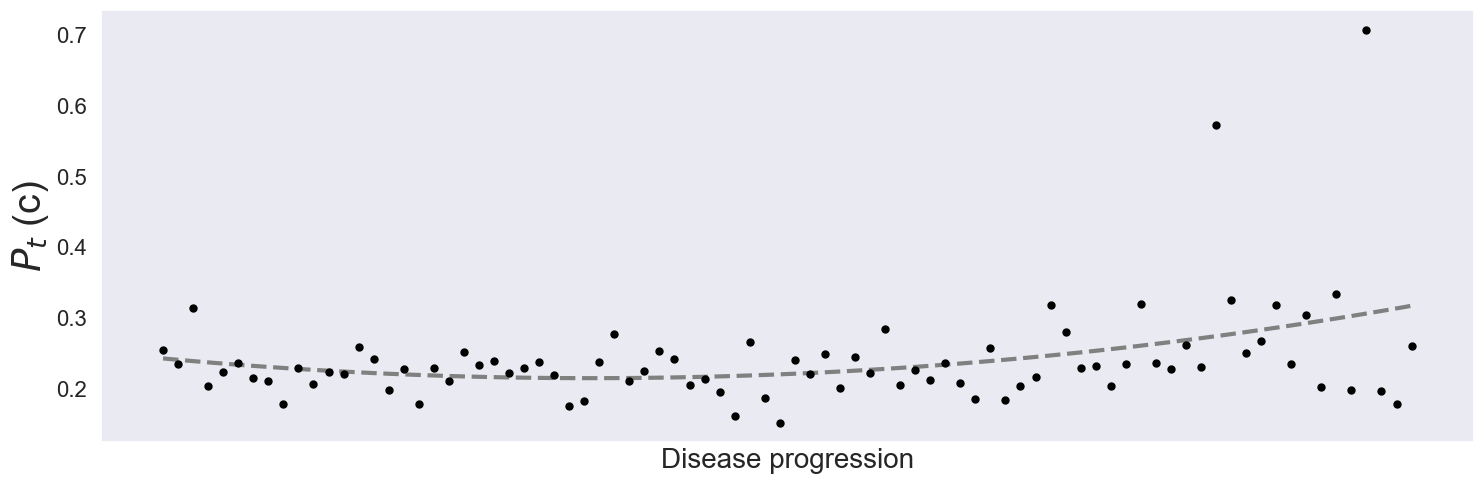

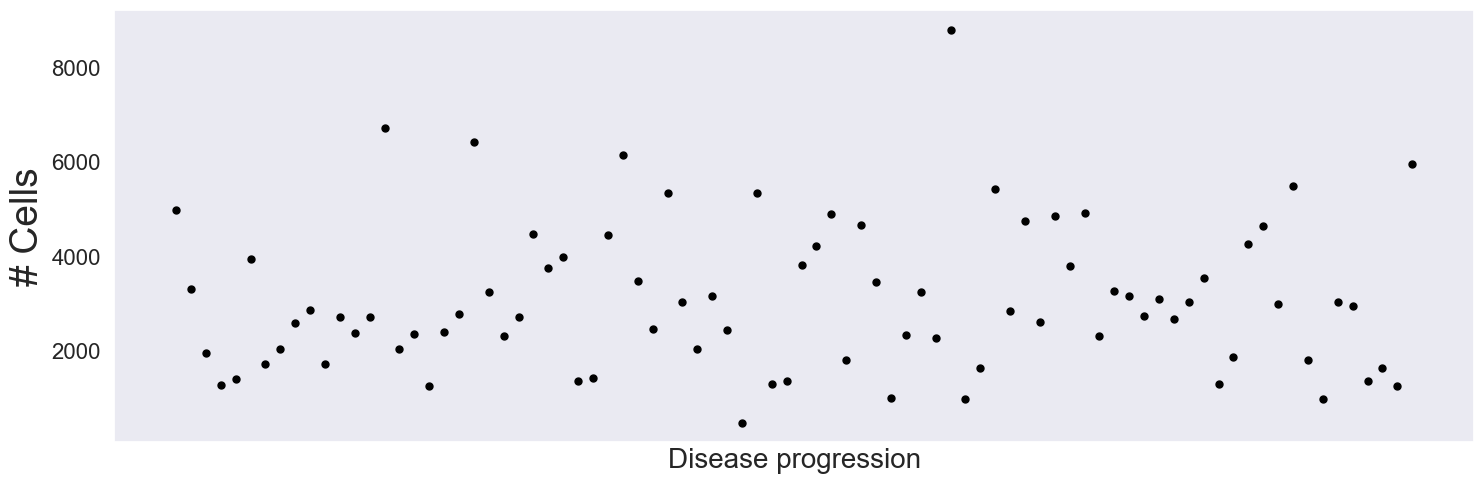

In [107]:
from sklearn.metrics import r2_score

df_c_time = pd.DataFrame()
df_c_time['c'] = np.zeros(n_categories * n_arm)
df_c_time['arm'] = np.zeros(n_categories * n_arm)
df_c_time['r2'] = np.zeros(n_categories * n_arm)
df_c_time['pearson_corr'] = np.zeros(n_categories * n_arm)
df_c_time['pearson_corr_fit'] = np.zeros(n_categories * n_arm)
count = 0
for arm in range(1):
    qc = outcome['q_c'][-1][arm, :, :]
    df_c = pd.DataFrame()
    df_c['c'] = outcome['pred_label'][-1][arm].astype(int)
    for ic in range(qc.shape[-1]):
        df_c[f'qc_{ic}'] = qc[:, ic]
    df_c['donor'] = data['external_donor_name'][np.array(outcome['sample_id'][-1]).astype(int)]
    df_c['ps'] = data['ps_time'][np.array(outcome['sample_id'][-1]).astype(int)]
    df_c_group= df_c.groupby(by='donor').agg([np.mean, np.sum, np.std]).reset_index()
    for ic in range(qc.shape[-1]):
      
        idx = np.argsort(df_c_group.ps['mean'].values)
        idx = idx[::-1]
        x = np.arange(len(df_c_group))
#         plt.errorbar(x, df_c_group.ps['mean'].iloc[idx],  yerr = df_c_group.ps['std'].iloc[idx], 
#                      linestyle='None',  marker='s', mfc='Navy', mec='Navy',  capsize=3,  ecolor='Navy', label='Ref.')
        if np.mean(df_c_group[f'qc_{ic}']['mean'].iloc[idx]) > 0:
            plt.figure(figsize=[15, 5],dpi=100)
            plt.errorbar(x, df_c_group[f'qc_{ic}']['mean'].iloc[idx],  yerr = 0.*df_c_group[f'qc_{ic}']['mean'].iloc[idx]**2, 
                         linestyle='None', marker='.', markersize=10, mfc='black', mec='black',  capsize=1, label='Pred.')
            poly10 = np.polyfit(x, df_c_group[f'qc_{ic}']['mean'].iloc[idx], 2)
            fun = np.poly1d(poly10)
            plt.plot(x, fun(x), '--', color='gray', linewidth=3)
            plt.xticks([])
            plt.yticks(fontsize=16)
            plt.ylabel(r'$P_t$ (c)', fontsize=fontsize)
            plt.xlabel('Disease progression',fontsize=20)
            plt.grid(b=None)
    #         plt.ylim([0.0, np.max(y)+0.1*np.max(y)])
#             plt.legend()
#             plt.title(f'C-type: {int(ic+1)}')
            plt.tight_layout()
            plt.savefig(saving_folder + '/qc_time_' + str(int(ic+1)) +'_arm_' + str(arm) + '.png', dpi=600)
            
            
            df_c_per_c = df_c[df_c['c'] == (ic + 1)]
            df_c_per_c_group = df_c_per_c.groupby(by='donor').agg([np.mean, np.sum, np.std]).reset_index()
            idx = np.argsort(df_c_per_c_group.ps['mean'].values)
            idx = idx[::-1]
            x = np.arange(len(df_c_per_c_group))
            plt.figure(figsize=[15, 5],dpi=100)
            plt.errorbar(x, df_c_per_c_group['c']['sum'].iloc[idx],  yerr = 0.*df_c_per_c_group['c']['sum'].iloc[idx], 
                         linestyle='None', marker='.', markersize=10, mfc='black', mec='black',  capsize=1, label='Pred.')
#             poly10 = np.polyfit(x, df_c_group['c']['sum'].iloc[idx], 2)
#             fun = np.poly1d(poly10)
#             plt.plot(x, fun(x), '--', color='gray', linewidth=3)
            plt.xticks([])
            plt.yticks(fontsize=16)
            plt.ylabel('# Cells', fontsize=fontsize)
            plt.xlabel('Disease progression',fontsize=20)
            plt.grid(b=None)
    #         plt.ylim([0.0, np.max(y)+0.1*np.max(y)])
#             plt.legend()
#             plt.title(f'C-type: {int(ic+1)}')
            plt.tight_layout()
            plt.savefig(saving_folder + '/numC_time_' + str(int(ic+1)) +'_arm_' + str(arm) + '.png', dpi=600)
            
            
            corr, _ = pearsonr(df_c_group.ps['mean'].iloc[idx], df_c_group[f'qc_{ic}']['mean'].iloc[idx])
            corr_fit, _ = pearsonr(df_c_group.ps['mean'].iloc[idx], fun(x))
            df_c_time['c'][count] = int(ic+1)
            df_c_time['pearson_corr'][count] = corr
            df_c_time['pearson_corr_fit'][count] = corr_fit
            df_c_time['arm'][count] = arm
            df_c_time['r2'][count] = r2_score(df_c_group[f'qc_{ic}']['mean'].iloc[idx], fun(x))
            count += 1
df_c_time = df_c_time.loc[:count-1]

In [19]:
df_c_time

,c,arm,r2,pearson_corr,pearson_corr_fit
0,1.0,0.0,0.198211,-0.443260,-0.985163
1,3.0,0.0,0.078269,0.154666,0.592506
2,8.0,0.0,0.110007,-0.177638,-0.543472
3,9.0,0.0,0.379838,0.575490,0.924398
4,10.0,0.0,0.172941,-0.288942,-0.700824
5,1.0,1.0,0.189327,-0.435431,-0.989064
6,3.0,1.0,0.081736,0.163008,0.608233
7,8.0,1.0,0.120262,-0.198383,-0.579495
8,9.0,1.0,0.368292,0.569948,0.929054
9,10.0,1.0,0.167961,-0.278670,-0.686072


1.0 1
using CPU ...
Total loss: 0.030779620965144465
Total loss: 0.03229243900360806
Total loss: 0.010683359280976999
Total loss: 0.011198123833829803
Total loss: 0.03127038769889623
Total loss: 0.025259200383776
Total loss: 0.011446403838428003
Total loss: 0.01109735478530638
Total loss: 0.010671169480441936
Total loss: 0.010398422771166744


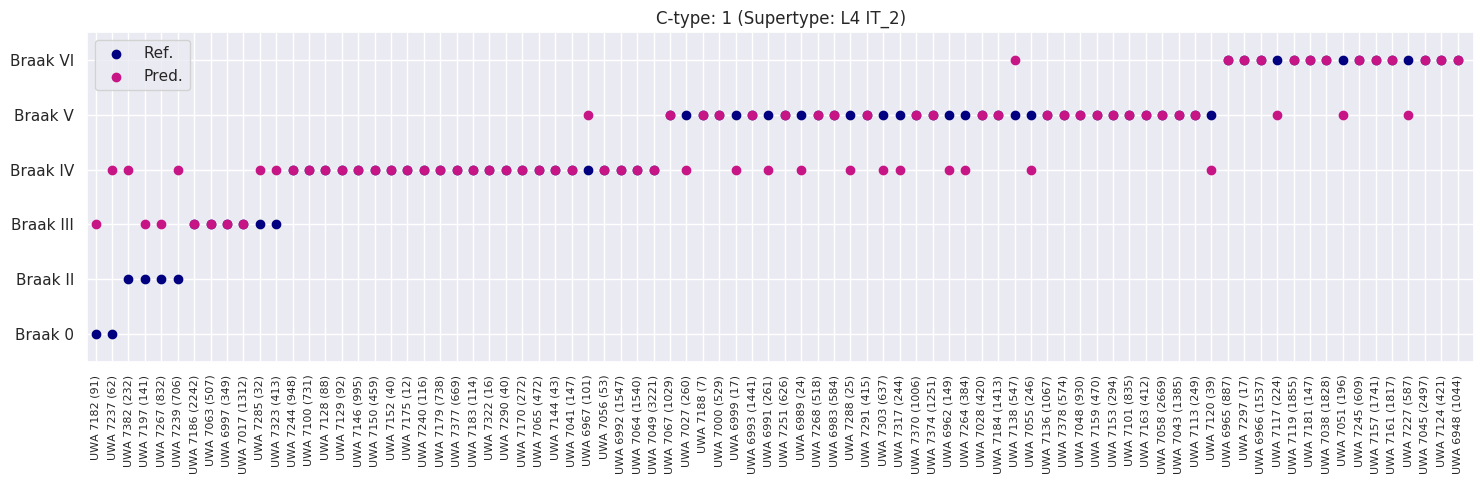

Pearsons correlation: 0.796
3.0 0
using CPU ...
Total loss: 0.01958153222221881


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Total loss: 0.020292966510169208
Total loss: 0.019004568690434098
Total loss: 0.01802661526016891
Total loss: 0.021503463620319963
Total loss: 0.020258691860362887
Total loss: 0.020032746018841863
Total loss: 0.019079401157796383
Total loss: 0.01776407437864691
Total loss: 0.019084438565187156


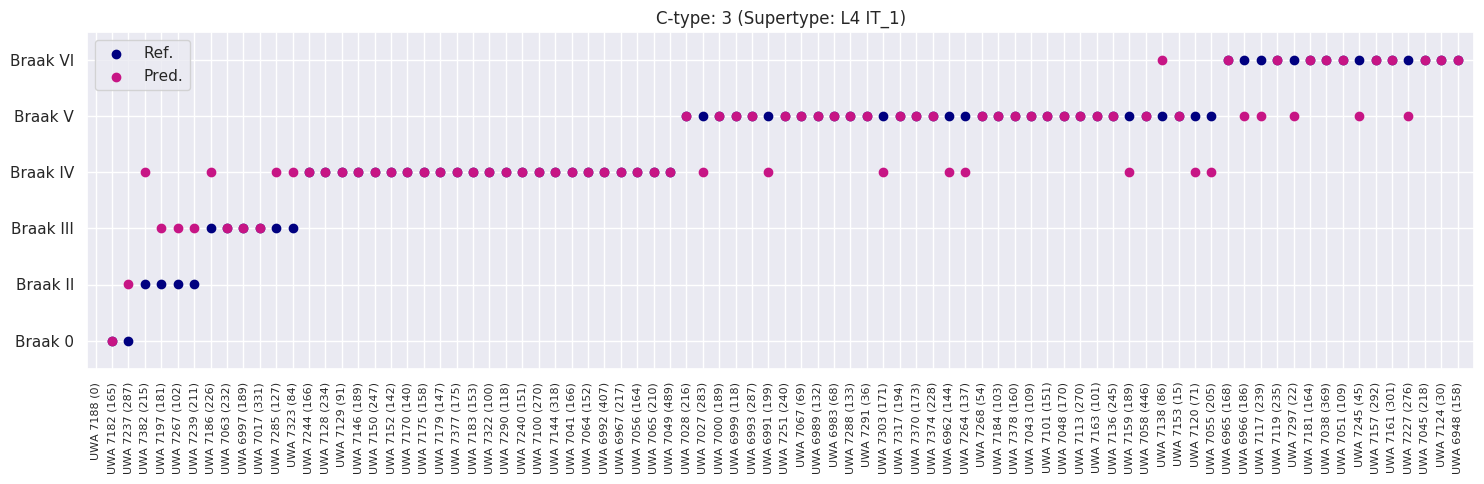

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.883
8.0 3
using CPU ...
Total loss: 0.018985523975321224
Total loss: 0.02020992205611297
Total loss: 0.02140980200575931
Total loss: 0.019947513405765806
Total loss: 0.024253831644143378
Total loss: 0.02370554581284523
Total loss: 0.019573918543756008
Total loss: 0.023347854348165647
Total loss: 0.021749835195285932
Total loss: 0.022497800045779774


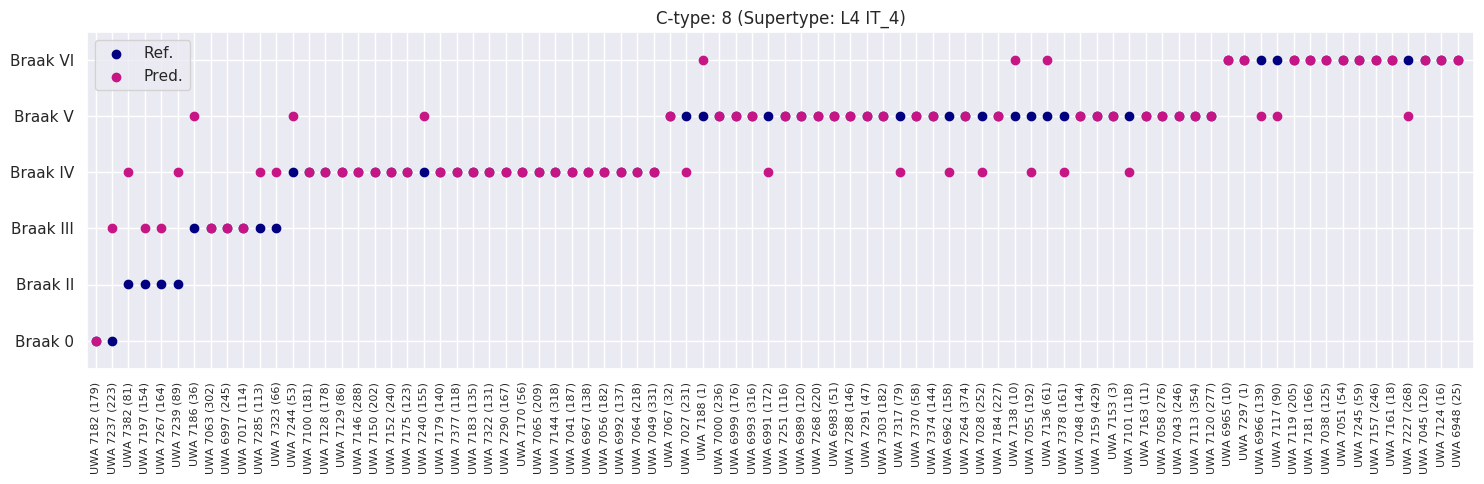

Pearsons correlation: 0.824
9.0 1
using CPU ...
Total loss: 0.01311885828285345
Total loss: 0.01342944152254079
Total loss: 0.01303530131865825
Total loss: 0.013872308993346192
Total loss: 0.01312282238671157
Total loss: 0.012709356428656195
Total loss: 0.012205574154255114
Total loss: 0.014233217200463904
Total loss: 0.01369865903896945
Total loss: 0.013792200537864119


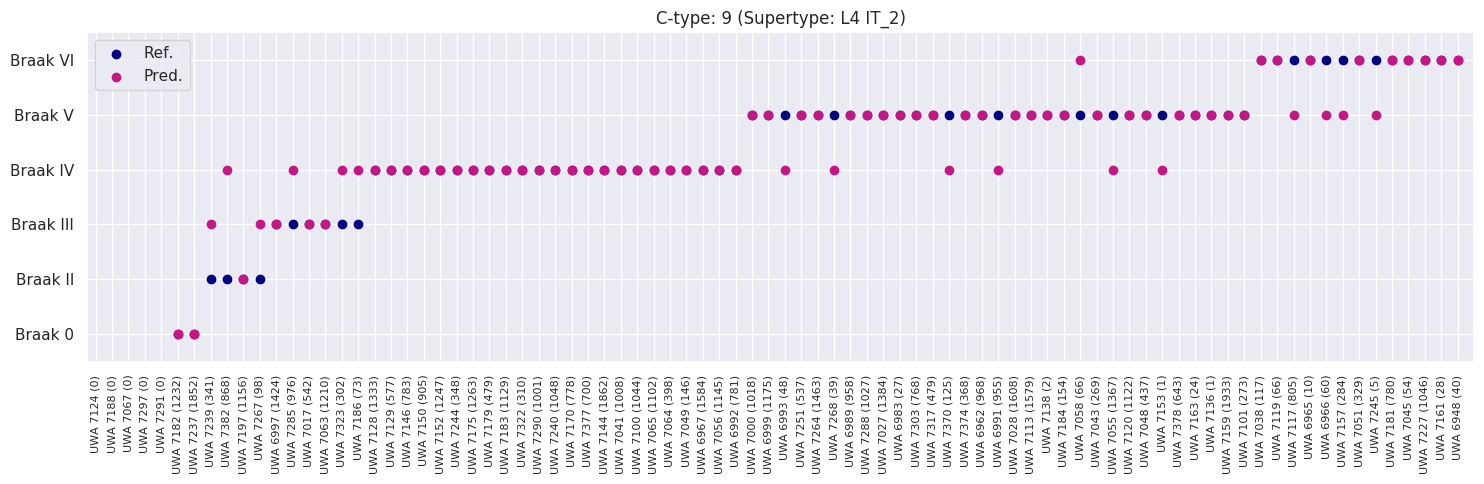

Pearsons correlation: 0.901
10.0 2
using CPU ...
Total loss: 0.0291780112311244
Total loss: 0.02427232451736927
Total loss: 0.019524586386978626
Total loss: 0.01826716586947441
Total loss: 0.018569466657936573
Total loss: 0.018026338890194893
Total loss: 0.022800850681960583
Total loss: 0.027133263647556305
Total loss: 0.022625932469964027
Total loss: 0.026429899036884308


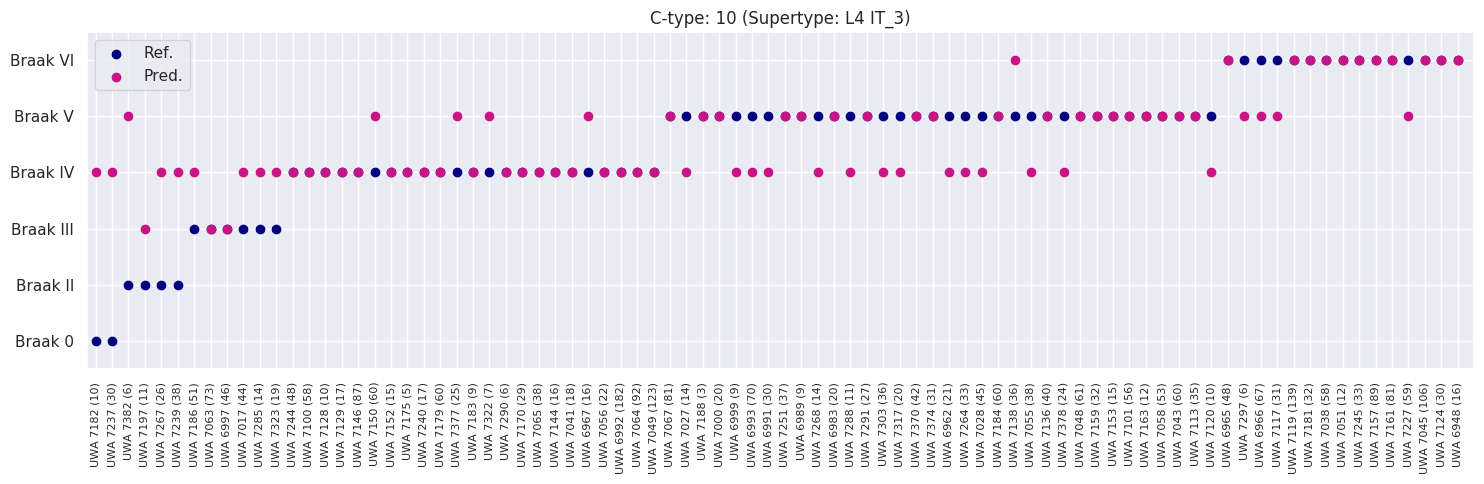

Pearsons correlation: 0.660


In [60]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
import pandas as pd

saving_folder = path + "/results/cpl_mixVAE/"
saving_folder = saving_folder + str(folder_name)

arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'braak'
m_ind = []
df_braak = pd.DataFrame()
df_braak['c'] = np.zeros(len(cat))
df_braak['superype'] = np.zeros(len(cat))
df_braak['pearson_corr'] = np.zeros(len(cat))
df_braak['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_moderate] = 1
    metadata = 'caa'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='MediumVioletRed', label='Pred.')
        plt.yticks(np.unique(data[metadata]), np.unique(data['braak']))
#         plt.xticks(x, uniq_donor[m_indx], rotation=90, fontsize=8)
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/braak_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score >= 0]
        y_true = meta_true_mean[meta_pred_score >= 0]
        df_braak['c'][i_c] = int(c)
        df_braak['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_braak['pearson_corr'][i_c] = corr
        df_braak['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [61]:
df_braak

,c,superype,pearson_corr,mse
0,1.0,L4 IT_2,0.796005,0.019524
1,3.0,L4 IT_1,0.883473,0.012048
2,8.0,L4 IT_4,0.824281,0.017143
3,9.0,L4 IT_2,0.901314,0.010127
4,10.0,L4 IT_3,0.659607,0.030000


1.0 1
using CPU ...
Total loss: 0.03642462788368849
Total loss: 0.034648495020947474
Total loss: 0.03604599485612091
Total loss: 0.049921949736445266
Total loss: 0.032931019052150935
Total loss: 0.04934377036988735
Total loss: 0.03493813655393965
Total loss: 0.0343079004327164
Total loss: 0.03292098325019812
Total loss: 0.051917169243097305


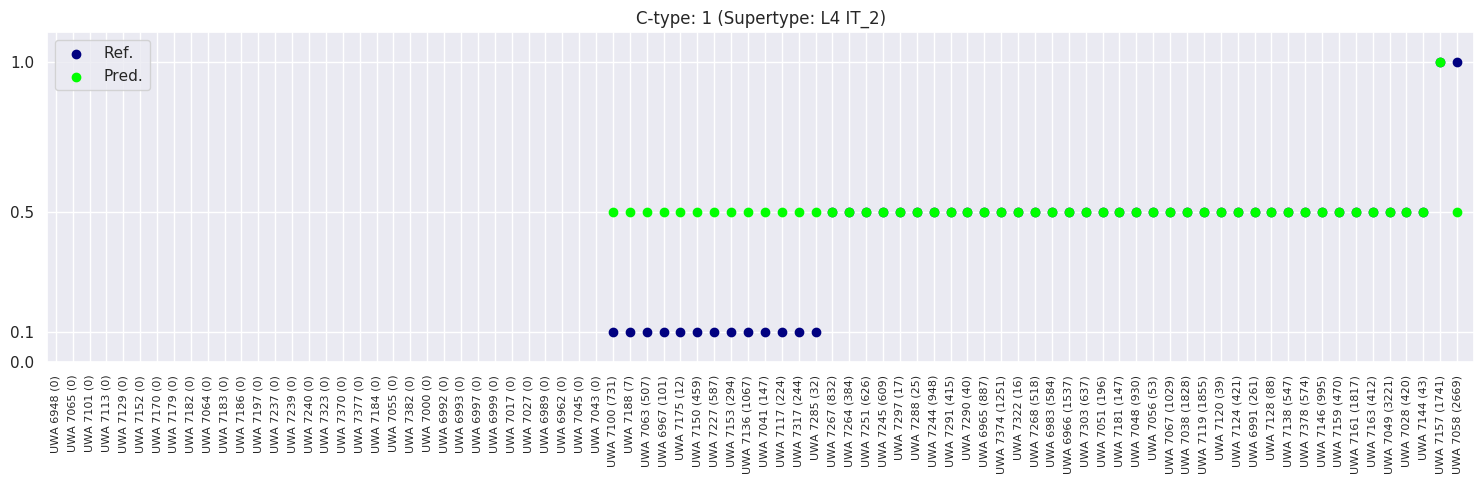

Pearsons correlation: 0.393
3.0 0
using CPU ...
Total loss: 0.04931824095547199


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Total loss: 0.049934493750333785
Total loss: 0.050102772563695906
Total loss: 0.04491268210113049
Total loss: 0.05383666642010212
Total loss: 0.04902336895465851
Total loss: 0.05527726262807846
Total loss: 0.04700905121862888
Total loss: 0.047027040272951126
Total loss: 0.05236121229827404


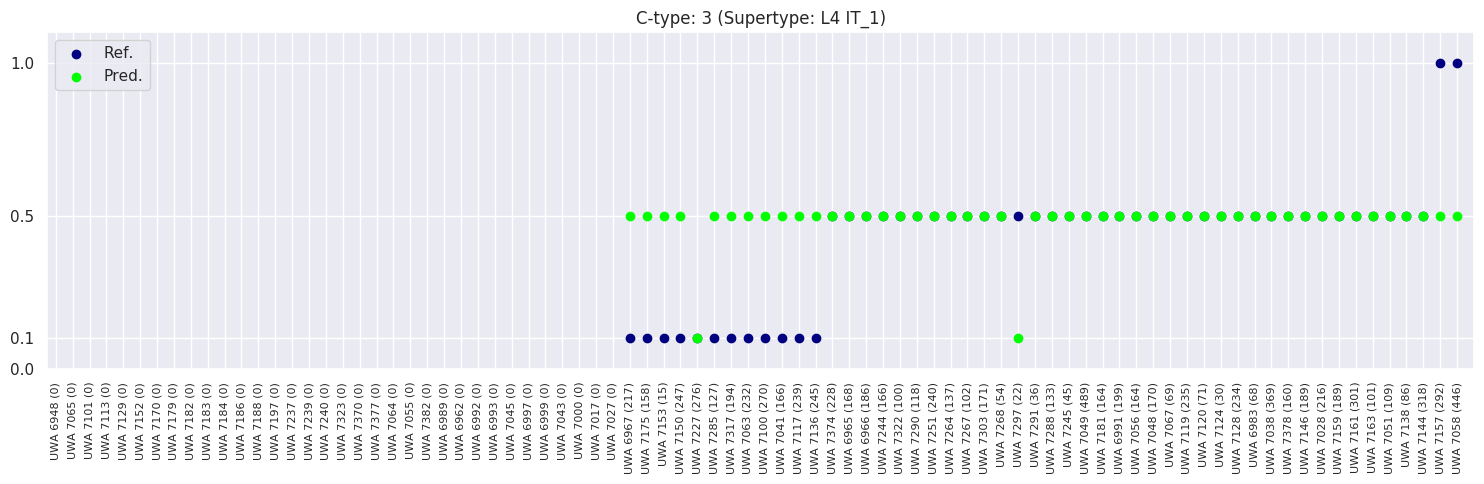

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.123
8.0 3
using CPU ...
Total loss: 0.04161783028393984
Total loss: 0.04155115969479084
Total loss: 0.0409941328689456
Total loss: 0.04397499095648527
Total loss: 0.04550286661833525
Total loss: 0.038069895934313536
Total loss: 0.043292003218084574
Total loss: 0.04140131827443838
Total loss: 0.04261911101639271
Total loss: 0.040989638306200504


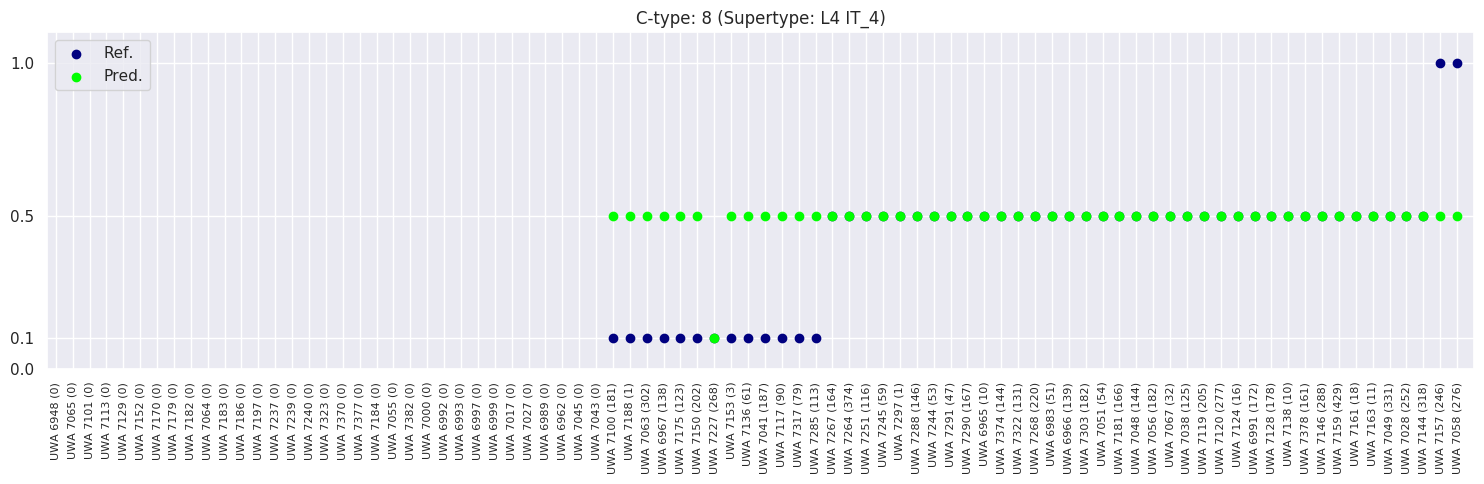

Pearsons correlation: 0.215
9.0 0
using CPU ...
Total loss: 0.030179838940966874
Total loss: 0.03304343612398952
Total loss: 0.030892523645889014
Total loss: 0.029555399960372597
Total loss: 0.031629482633434236
Total loss: 0.03223358583636582
Total loss: 0.02990896435221657
Total loss: 0.027785822981968522
Total loss: 0.030558909405954182
Total loss: 0.032281702500768006


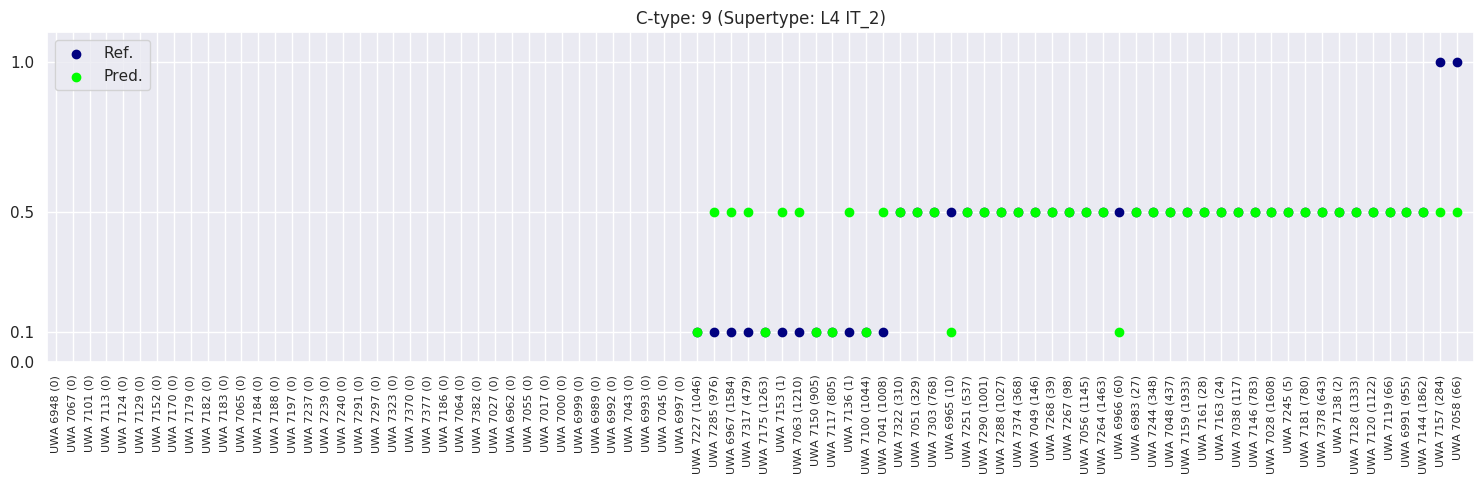

Pearsons correlation: 0.402
10.0 2
using CPU ...
Total loss: 0.03452669829130173
Total loss: 0.035407401621341705
Total loss: 0.0468275211751461
Total loss: 0.042548928409814835
Total loss: 0.0479869544506073
Total loss: 0.0474788174033165
Total loss: 0.03611355647444725
Total loss: 0.03617481887340546
Total loss: 0.037952080368995667
Total loss: 0.03934989869594574


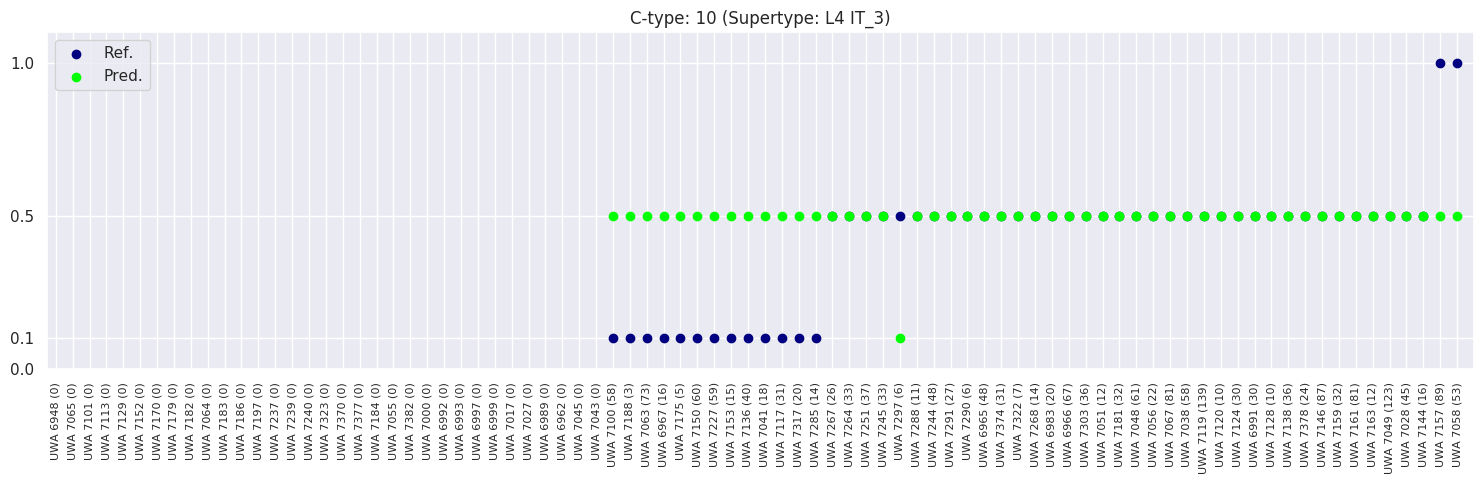

Pearsons correlation: -0.056


In [62]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
import pandas as pd

saving_folder = path + "/results/cpl_mixVAE/"
saving_folder = saving_folder + str(folder_name)

seed = 100
kfold = 10
metadata = 'caascore'

m_ind = []
df_caa = pd.DataFrame()
df_caa['c'] = np.zeros(len(cat))
df_caa['superype'] = np.zeros(len(cat))
df_caa['pearson_corr'] = np.zeros(len(cat))
df_caa['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_severe] = 1
    metadata = 'caa'

if metadata == 'cscore':
    data['cs'] = np.zeros(len(data[metadata]))
    indx_absent = np.where(data[metadata] == 'Absent')[0]
    indx_mild = np.where(data[metadata] == 'Sparse')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Frequent')[0]
    data['cs'][indx_absent] = .1
    data['cs'][indx_mild] = .4
    data['cs'][indx_moderate] = .7
    data['cs'][indx_severe] = 1
    metadata = 'cs'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    

arm = 0
if metadata == 'caa':
    indx = np.where(data[metadata] > 0)[0]
else:
    indx = np.arange(len(data[metadata]))

state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, indx]
s_idx = outcome['sample_id'][-1].astype(int)[indx]
categories = np.unique(pred_type)
eval_dict = [[None] for i in categories]

supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
super_type = data['supertype_scANVI'][s_idx]
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='Lime', label='Pred.')
        plt.yticks(np.unique(data[metadata]), np.unique(data[metadata]))
#         plt.xticks(x, uniq_donor[m_indx], rotation=90, fontsize=8)
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([0.0, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/caascore_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score > 0]
        y_true = meta_true_mean[meta_pred_score > 0]
        df_caa['c'][i_c] = int(c)
        df_caa['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_caa['pearson_corr'][i_c] = corr
        df_caa['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [63]:
df_caa

,c,superype,pearson_corr,mse
0,1.0,L4 IT_2,0.393490,0.045686
1,3.0,L4 IT_1,0.122600,0.048400
2,8.0,L4 IT_4,0.214631,0.047451
3,9.0,L4 IT_2,0.402142,0.042174
4,10.0,L4 IT_3,-0.055645,0.053725


1.0 1
using CPU ...
Total loss: 0.05231673812626728
Total loss: 0.018329826042255654
Total loss: 0.05613104473533375
Total loss: 0.017137796950659583
Total loss: 0.053198904996471744
Total loss: 0.01964075171105963
Total loss: 0.01913126836630649
Total loss: 0.06011834743964885
Total loss: 0.05338780430611223
Total loss: 0.05021347256011462


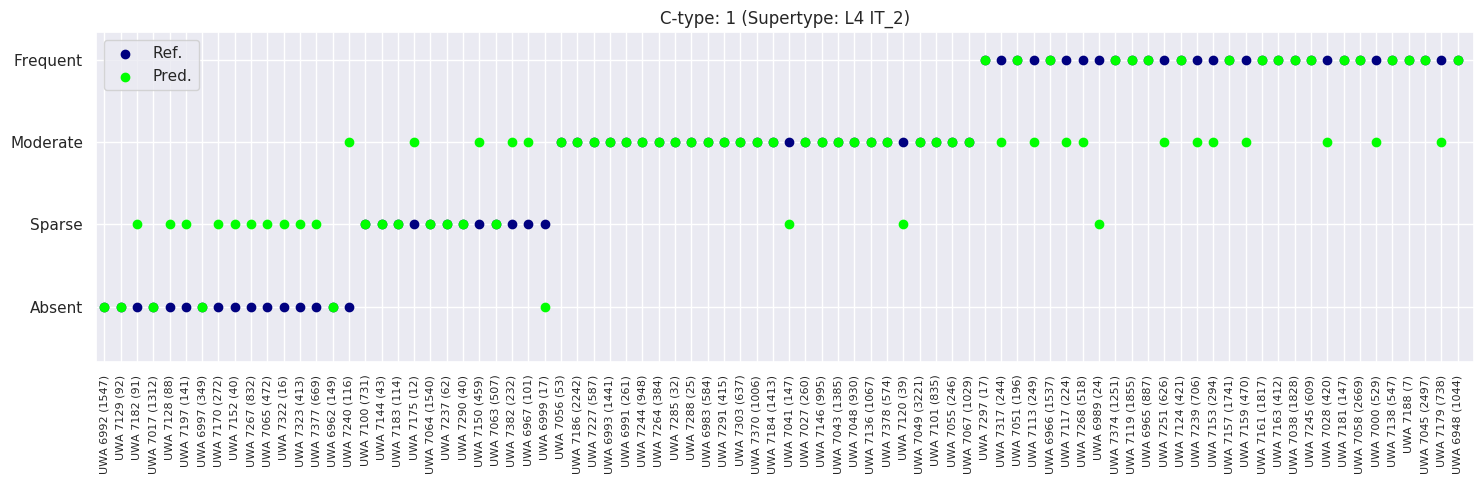

Pearsons correlation: 0.810
3.0 0
using CPU ...
Total loss: 0.036304698092862964


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Total loss: 0.03535743011161685
Total loss: 0.030475233448669314
Total loss: 0.032789248740300536
Total loss: 0.0350010939873755
Total loss: 0.035831184359267354
Total loss: 0.03377846139483154
Total loss: 0.03409330639988184
Total loss: 0.031702441396191716
Total loss: 0.03362406091764569


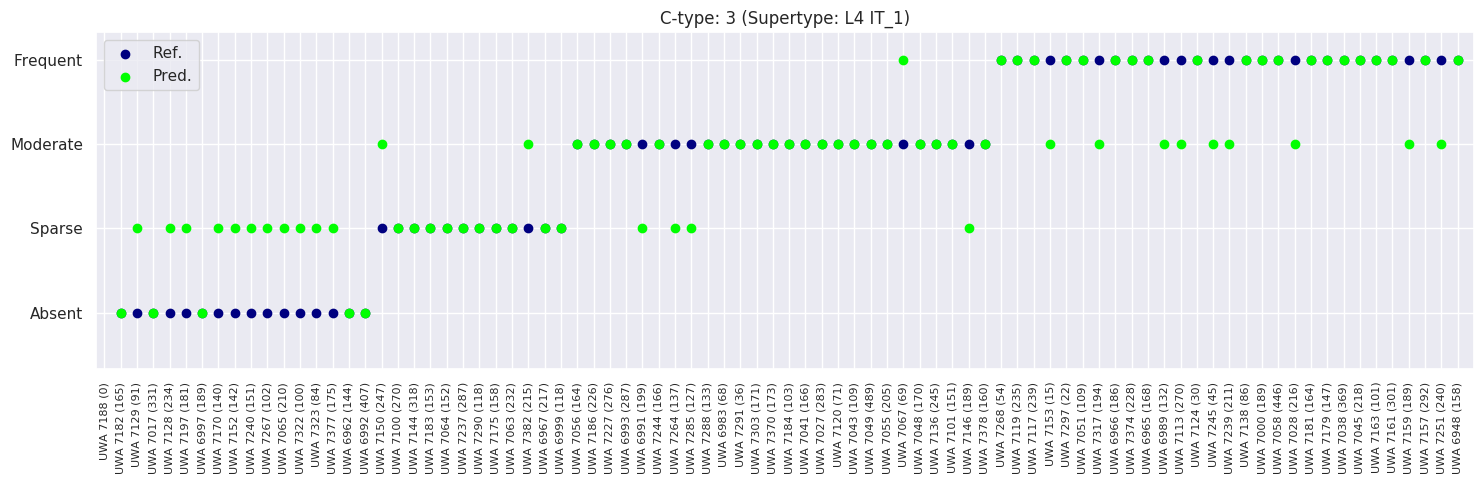

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.861
8.0 3
using CPU ...
Total loss: 0.044443387006010325
Total loss: 0.04792601029787745
Total loss: 0.04356784000992775
Total loss: 0.04408260754176548
Total loss: 0.045010367674486976
Total loss: 0.043281826323696544
Total loss: 0.043650618089096885
Total loss: 0.04989128905747618
Total loss: 0.04234194170151438
Total loss: 0.045159141932215006


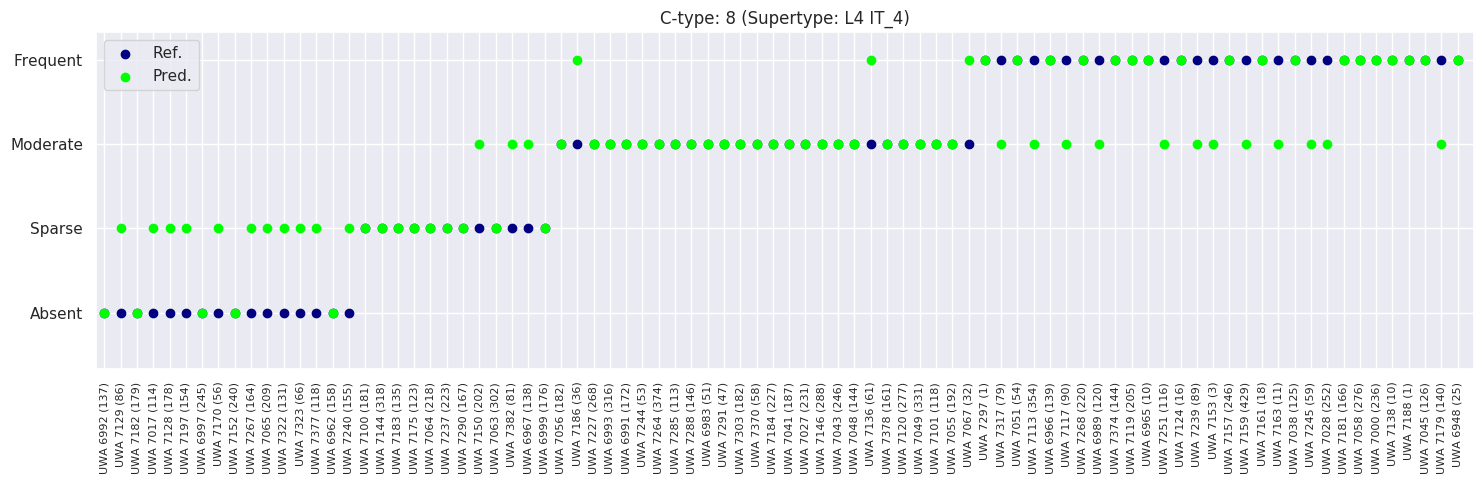

Pearsons correlation: 0.856
9.0 1
using CPU ...
Total loss: 0.028581902584327117
Total loss: 0.03163576774698283
Total loss: 0.030308469398213283
Total loss: 0.032235853922819455
Total loss: 0.03124652254129095
Total loss: 0.030472765460477343
Total loss: 0.028339627531490157
Total loss: 0.028735201539737836
Total loss: 0.029776958815221275
Total loss: 0.031065106026030014


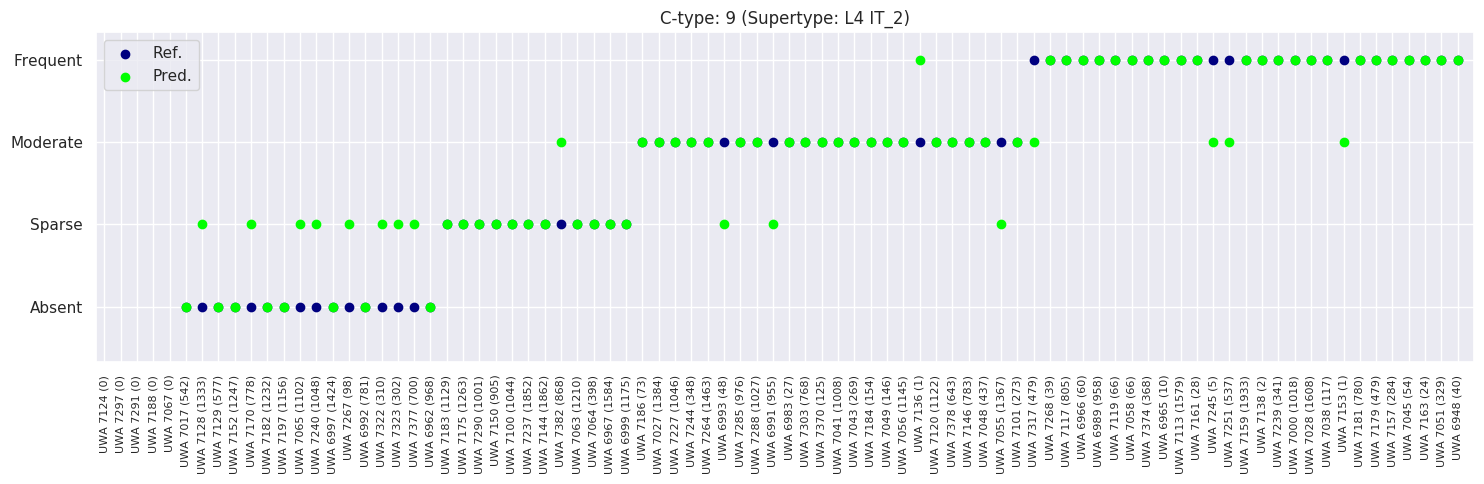

Pearsons correlation: 0.912
10.0 2
using CPU ...
Total loss: 0.039511945098638535
Total loss: 0.044105274602770805
Total loss: 0.0479377843439579
Total loss: 0.0369760449975729
Total loss: 0.04118957370519638
Total loss: 0.04305858351290226
Total loss: 0.03696299344301224
Total loss: 0.04261637665331364
Total loss: 0.04489818029105663
Total loss: 0.04639460705220699


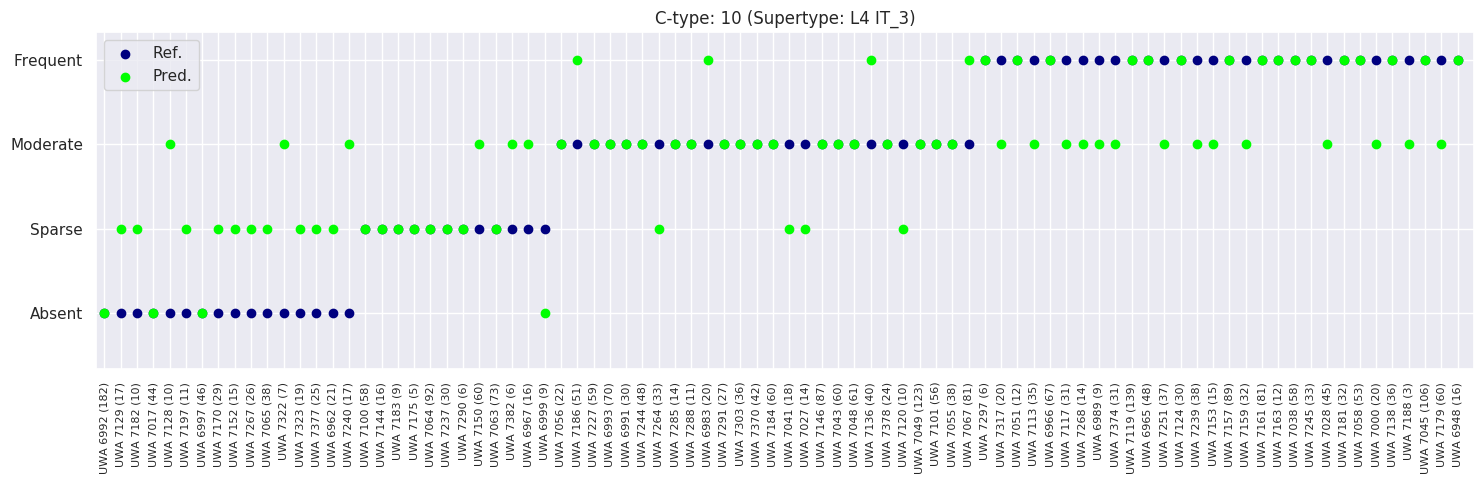

Pearsons correlation: 0.734


In [64]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
import pandas as pd

saving_folder = path + "/results/cpl_mixVAE/"
saving_folder = saving_folder + str(folder_name)

arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'cscore'

m_ind = []
df_cs = pd.DataFrame()
df_cs['c'] = np.zeros(len(cat))
df_cs['superype'] = np.zeros(len(cat))
df_cs['pearson_corr'] = np.zeros(len(cat))
df_cs['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_severe] = 1
    metadata = 'caa'

if metadata == 'cscore':
    data['cs'] = np.zeros(len(data[metadata]))
    indx_absent = np.where(data[metadata] == 'Absent')[0]
    indx_mild = np.where(data[metadata] == 'Sparse')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Frequent')[0]
    data['cs'][indx_absent] = .1
    data['cs'][indx_mild] = .4
    data['cs'][indx_moderate] = .7
    data['cs'][indx_severe] = 1
    metadata = 'cs'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='Lime', label='Pred.')
        plt.yticks(np.unique(data[metadata]), ['Absent', 'Sparse','Moderate', 'Frequent'])
#         plt.xticks(x, uniq_donor[m_indx], rotation=90, fontsize=8)
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/cscore_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score > 0]
        y_true = meta_true_mean[meta_pred_score > 0]
        df_cs['c'][i_c] = int(c)
        df_cs['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_cs['pearson_corr'][i_c] = corr
        df_cs['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [65]:
df_cs

,c,superype,pearson_corr,mse
0,1.0,L4 IT_2,0.809518,0.038571
1,3.0,L4 IT_1,0.861037,0.029277
2,8.0,L4 IT_4,0.855617,0.031071
3,9.0,L4 IT_2,0.911934,0.019367
4,10.0,L4 IT_3,0.734066,0.051429


1.0 1
using CPU ...
Total loss: 0.04512772002739699
Total loss: 0.16938516098473752
Total loss: 0.1905767914972135
Total loss: 0.18765383958816528
Total loss: 0.17379081887858255
Total loss: 0.19311882395829474
Total loss: 0.04673256414493413
Total loss: 0.18624306230672769
Total loss: 0.04157032756276229
Total loss: 0.04092585206776026


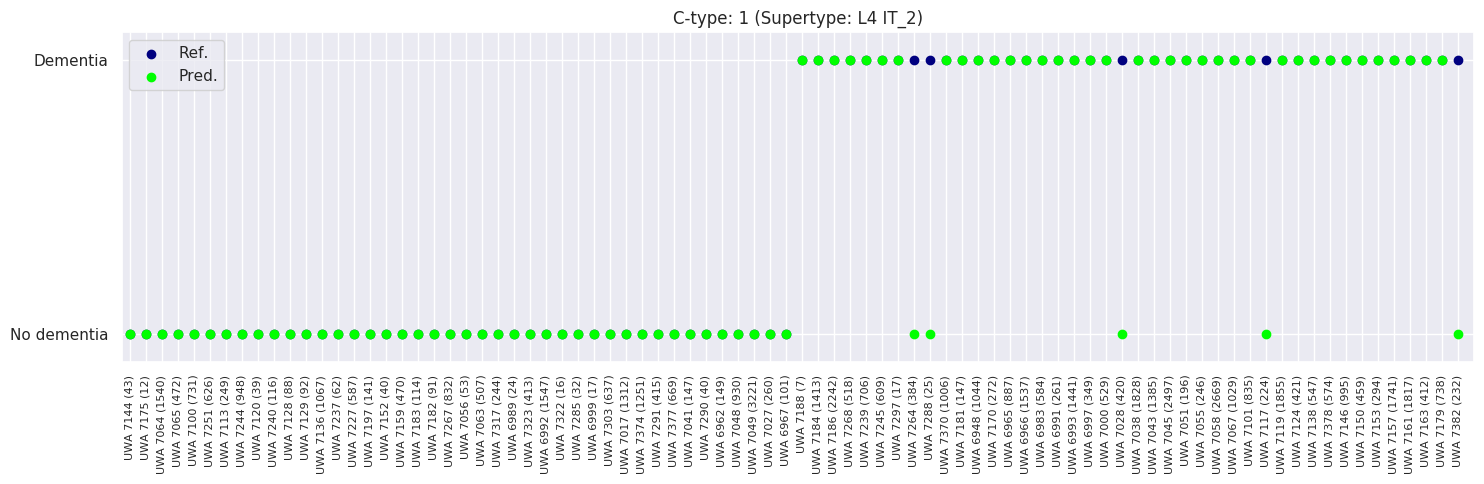

Pearsons correlation: 0.887
3.0 0
using CPU ...


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Total loss: 0.093136933632195
Total loss: 0.09147648327052593
Total loss: 0.08934040879830718
Total loss: 0.08274655137211084
Total loss: 0.08253879519179463
Total loss: 0.08767738286405802
Total loss: 0.07891387213021517
Total loss: 0.08514797827228904
Total loss: 0.07592178042978048
Total loss: 0.07907076273113489


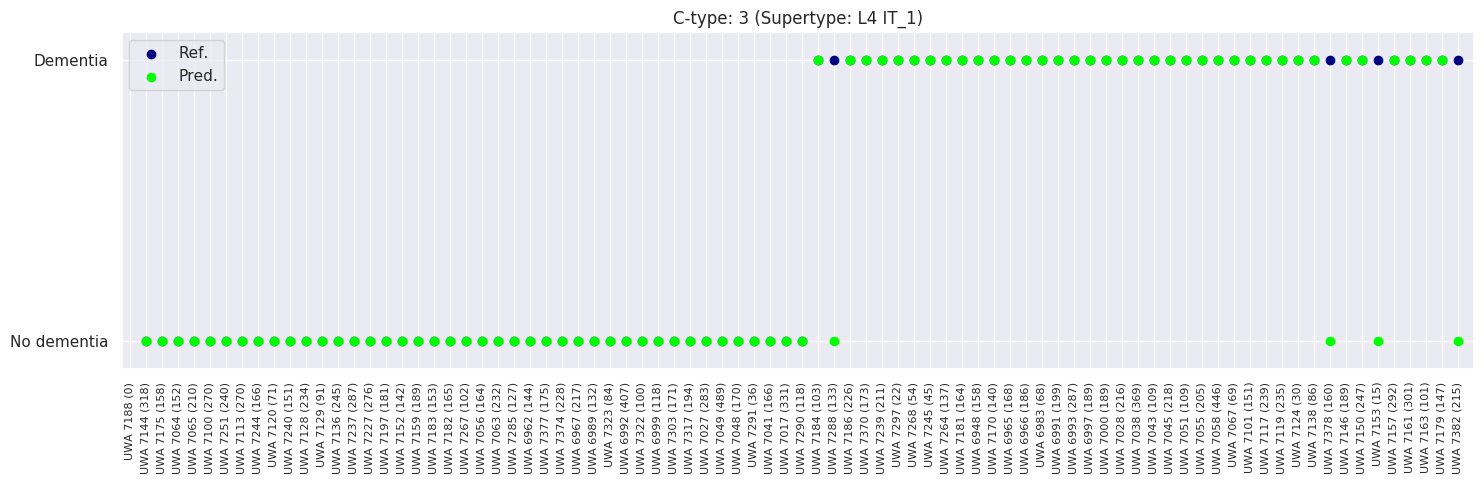

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.908
8.0 3
using CPU ...
Total loss: 0.10020594937460763
Total loss: 0.112496018409729
Total loss: 0.10057709366083145
Total loss: 0.10916391440800258
Total loss: 0.11476441259895052
Total loss: 0.1046063101717404
Total loss: 0.11142093049628395
Total loss: 0.11415082109825951
Total loss: 0.09932832952056612
Total loss: 0.11615482504878726


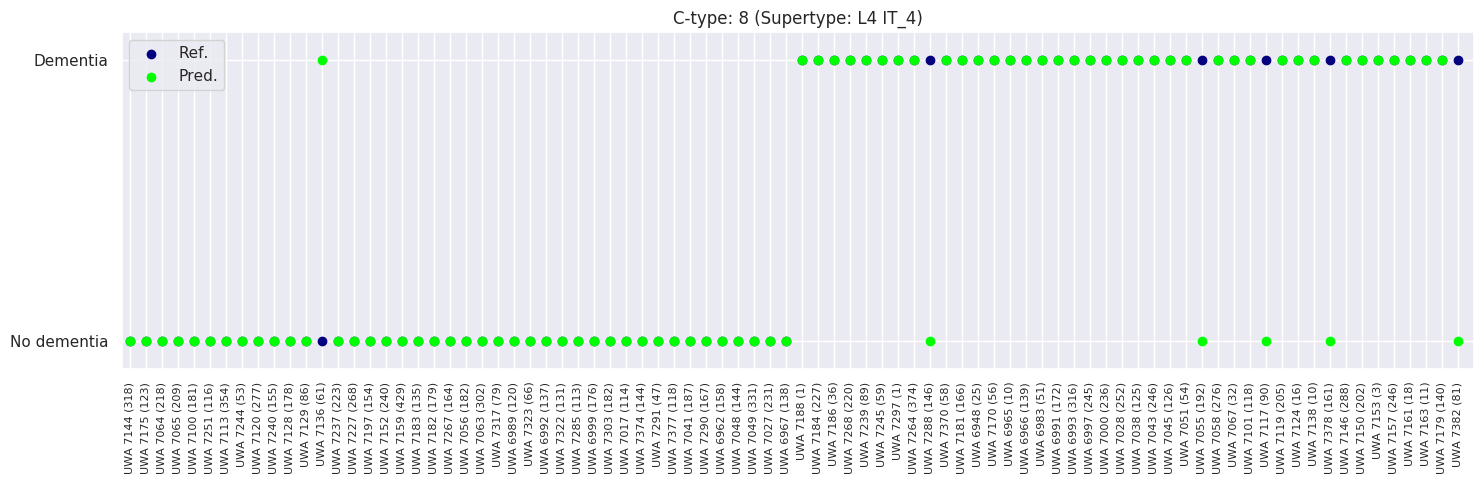

Pearsons correlation: 0.861
9.0 1
using CPU ...
Total loss: 0.05992614835434194
Total loss: 0.06693452057827796
Total loss: 0.06052399210498801
Total loss: 0.061357000921686576
Total loss: 0.059338050977593024
Total loss: 0.058822674194483886
Total loss: 0.06344010522921703
Total loss: 0.06884679464357239
Total loss: 0.06264740556278932
Total loss: 0.0617272002356393


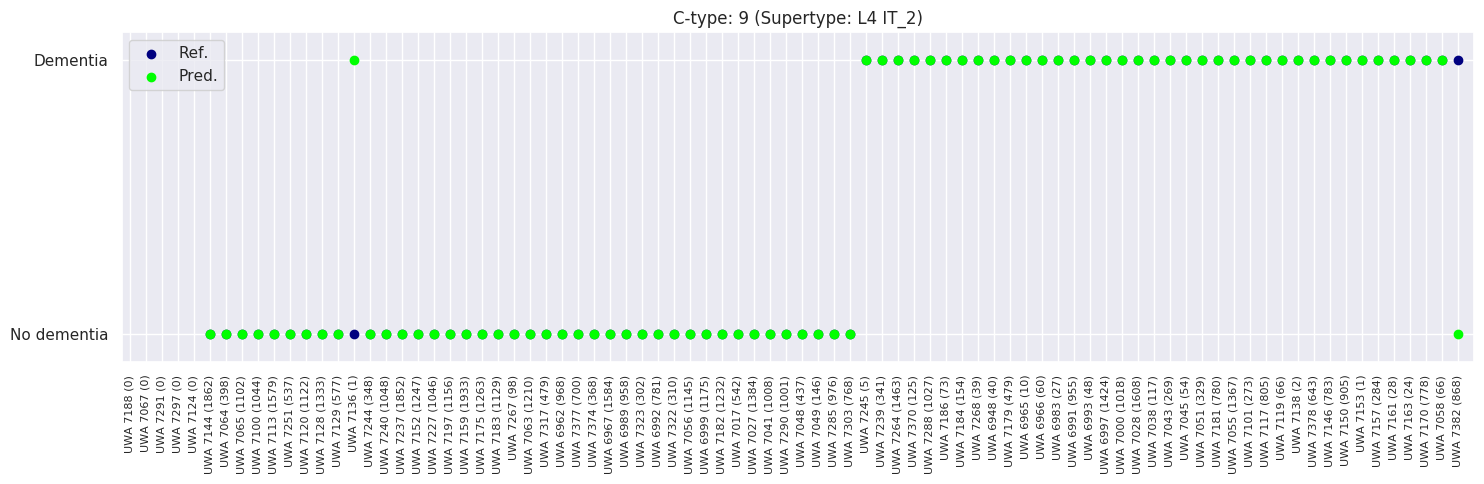

Pearsons correlation: 0.949
10.0 2
using CPU ...
Total loss: 0.10305369272828102
Total loss: 0.09347059950232506
Total loss: 0.08743083104491234
Total loss: 0.10434979945421219
Total loss: 0.1088901087641716
Total loss: 0.12271629273891449
Total loss: 0.09339801594614983
Total loss: 0.07167478278279305
Total loss: 0.10756117850542068
Total loss: 0.08034872636198997


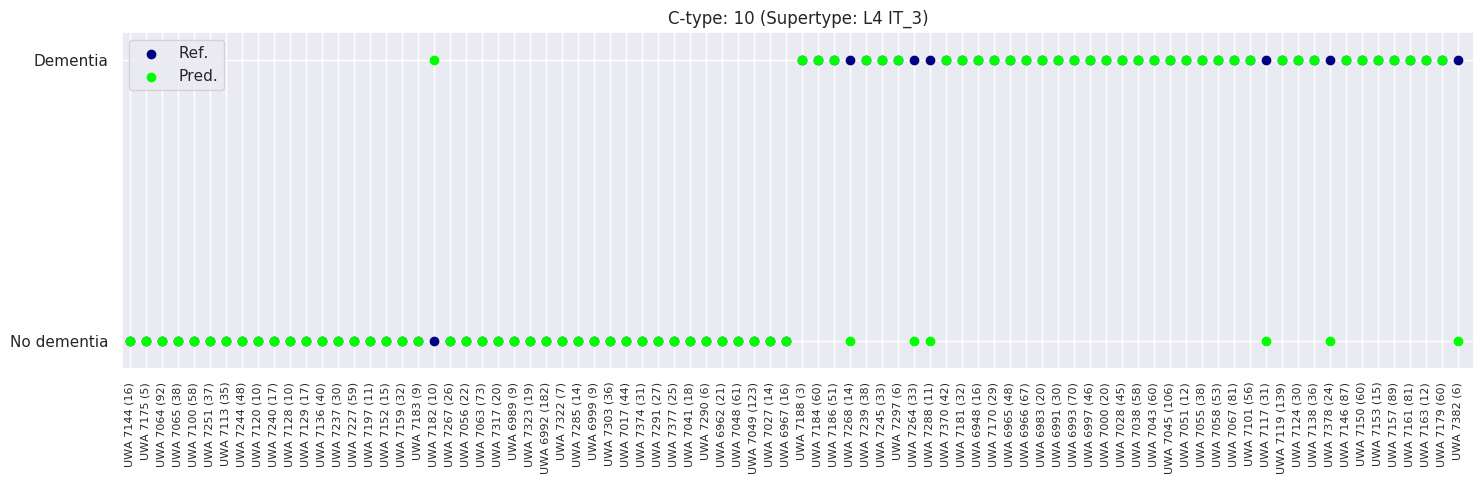

Pearsons correlation: 0.839


In [66]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold


arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'cognitive_status_binary'

m_ind = []
df_cs_binary = pd.DataFrame()
df_cs_binary['c'] = np.zeros(len(cat))
df_cs_binary['superype'] = np.zeros(len(cat))
df_cs_binary['pearson_corr'] = np.zeros(len(cat))
df_cs_binary['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False


for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)
                    

        meta_pred_score = np.array(meta_pred_score)
        color = np.array(color)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='Lime', label='Pred.')
        plt.yticks(np.unique(data[metadata]), ['No dementia', 'Dementia'])
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/cs_binary_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score >= 0]
        y_true = meta_true_mean[meta_pred_score >= 0]
        df_cs_binary['c'][i_c] = int(c)
        df_cs_binary['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_cs_binary['pearson_corr'][i_c] = corr
        df_cs_binary['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [67]:
df_cs_binary

,c,superype,pearson_corr,mse
0,1.0,L4 IT_2,0.887262,0.059524
1,3.0,L4 IT_1,0.907726,0.048193
2,8.0,L4 IT_4,0.861057,0.071429
3,9.0,L4 IT_2,0.949294,0.025316
4,10.0,L4 IT_3,0.839302,0.083333


In [37]:
import scanpy as sc

In [51]:
np.unique(pred_type)

array([ 1.,  3.,  8.,  9., 10.])

In [44]:
pred_type.shape

(152052,)

In [46]:
import umap
reducer = umap.UMAP()
x_umap = reducer.fit_transform(data['log1p'])

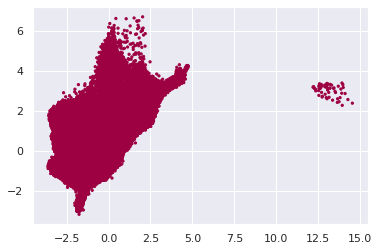

In [49]:
IT_2 = np.where(data['label']==2)[0]
plt.scatter(x_umap[IT_2, 0], x_umap[IT_2, 1], c=data['label'][IT_2], cmap='Spectral', s=5)

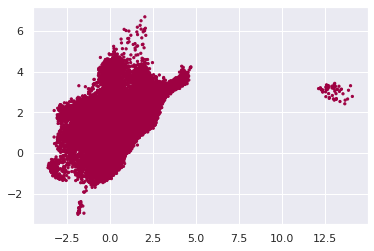

In [55]:
IT_2 = np.where(pred_type==1)[0]
plt.scatter(x_umap[IT_2, 0], x_umap[IT_2, 1], c=pred_type[IT_2], cmap='Spectral', s=5)

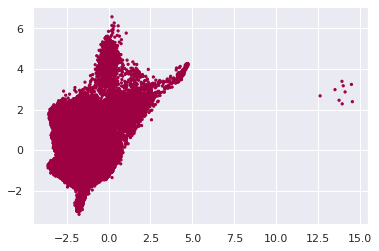

In [56]:
IT_2 = np.where(pred_type==9)[0]
plt.scatter(x_umap[IT_2, 0], x_umap[IT_2, 1], c=pred_type[IT_2], cmap='Spectral', s=5)

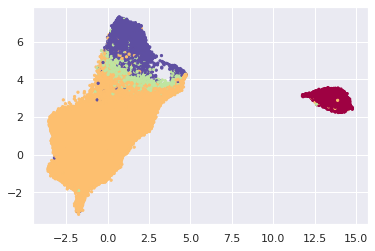

In [47]:
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=data['label'], cmap='Spectral', s=5)

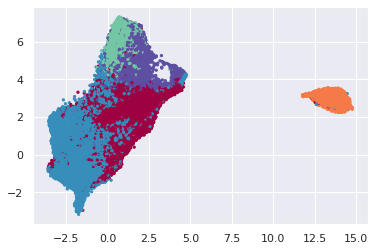

In [48]:
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=pred_type, cmap='Spectral', s=5)

In [68]:
data.keys()


dict_keys(['barcode', 'sample_id', 'donor_name', 'external_donor_name', 'class', 'subclass', 'subclass_color', 'supertype', 'cluster', 'cluster_color', 'class_scANVI', 'subclass_scANVI', 'supertype_scANVI', 'supertype_scANVI_leiden', 'scvi_labels', 'age', 'sex', 'age_at_death', 'thal', 'braak', 'cscore', 'caascore', 'cognitive_status', 'age_onsetcs', 'age_diag', 'lewybodydisease', 'late_stage', 'cognitive_status_binary', 'gene_id', 'log1p', 'donor_num', 'ps_time', 'label', 'color', 'label_id', 'braak_num', 'braak_int', 'caa', 'cs', 'cs_binary'])

In [69]:
data['external_donor_name']

array(['UWA 7159', 'UWA 7159', 'UWA 7159', ..., 'UWA 7067', 'UWA 7067',
       'UWA 7067'], dtype='<U10')

In [73]:
uniq_dd = np.unique(data['external_donor_name'])
num_cell = np.zeros(len(uniq_dd))
ps_d = np.zeros(len(uniq_dd))

for iid, dd in enumerate(uniq_dd):
    num_cell[iid] = sum(data['external_donor_name']==dd)
    ps_d[iid] = data['ps_time'][data['external_donor_name']==dd][0]
        

In [74]:
idx = np.argsort(ps_d)


In [75]:
ps_d[idx]

array([0.07148746, 0.07593546, 0.07764612, 0.08892324, 0.08898071,
       0.08988779, 0.09315747, 0.10008848, 0.10392603, 0.10878458,
       0.11043725, 0.12103243, 0.12506202, 0.13047882, 0.13161733,
       0.14317883, 0.14993509, 0.15278984, 0.15520204, 0.15569487,
       0.16190425, 0.16537331, 0.17820666, 0.18195919, 0.18506636,
       0.18913506, 0.20965295, 0.20997377, 0.21348472, 0.22214136,
       0.2342964 , 0.23921912, 0.24581481, 0.24611217, 0.25040112,
       0.25112352, 0.25548211, 0.26007601, 0.27066803, 0.27183928,
       0.2749943 , 0.27663604, 0.2950035 , 0.30995909, 0.31281293,
       0.31978396, 0.32172296, 0.34705682, 0.35605386, 0.3740492 ,
       0.38346891, 0.3871683 , 0.41111813, 0.42426537, 0.47711117,
       0.47965335, 0.48199526, 0.48252371, 0.51370344, 0.55787211,
       0.56117307, 0.61958878, 0.62302977, 0.6285328 , 0.63166984,
       0.64436812, 0.6638267 , 0.67636105, 0.69624858, 0.69768722,
       0.69982285, 0.70344497, 0.73835524, 0.7475574 , 0.76196

In [76]:
num_cell[idx]

array([2754., 1189., 1411.,  144., 2461.,  915.,  730.,  627., 3309.,
        937., 2124., 2185.,  641.,  172., 2124., 1382., 1631., 1624.,
        932., 1630., 2363., 1408., 2796., 1607., 1599., 1673., 3645.,
       2604., 2633., 1434.,  776., 4728., 1620., 1867., 1636.,  413.,
       2184., 2358., 1487., 2432., 2660., 2104., 2674., 1053., 2515.,
        590., 2142., 2131., 1455., 1651., 2485., 1505., 2270., 2388.,
       2525., 1459., 1599., 2598., 1988., 2662., 1636., 1390., 1888.,
       3212., 1927., 1492., 1314., 1544., 1745., 3420., 1299., 1545.,
       1747., 1304., 1766., 2438., 1636., 1292., 2173.,  904.,  929.,
        613., 1742., 2457.])

In [86]:
n = 7
print(ps_d[idx[n]], num_cell[idx[n]], uniq_dd[idx[n]])

0.10008847881210184 627.0 UWA 7291


In [85]:
n = 18
print(ps_d[idx[n]], num_cell[idx[n]], uniq_dd[idx[n]])

0.15520204420678152 932.0 UWA 7245


In [91]:
n = 30
print(ps_d[idx[n]], num_cell[idx[n]], uniq_dd[idx[n]])

0.234296402855689 776.0 UWA 6983


In [93]:
n = 45
print(ps_d[idx[n]], num_cell[idx[n]], uniq_dd[idx[n]])

0.31978395550295113 590.0 UWA 7163


In [ ]:
exclude_donors = np.array(['UWA 7291', 'UWA 7245', 'UWA 6983', 'UWA 7163'])
